# Software para análise de dados da Fórmula 1

# Explorando os dados da Fórmula 1

Importa a biblioteca Fast F1

In [1]:
import fastf1 as ff1

Habilita a pasta cache do projeto

In [2]:
# Enable the cache by providing the name of the cache folder
ff1.Cache.enable_cache('cache_data') 

## Carregando os dados de uma sessão

Para carregar os dados de uma sessão vamos utilizar a função **get_session**

Os principais parâmetros desta função que vamos utilizar são:

get_session(ano, gp, identificador da sessão)

Ano:
- Ano do campeonato: 2020, 2021, 2022 ...

GP:
- Número do GP no ano correspondente: em 2023 o GP do Japão foi o número de índice 16.
- Nome do GP: 'Monaco', 'Austria', dentre outros.

Identificadores de sessão:
- Abreviatura: 'FP1', 'FP2', 'FP3', 'Q', 'S', 'SS', R'
- Nome completo: 'Practice 1', 'Practice 2', 'Practice 3', 'Sprint', 'Sprint Shootout', 'Qualifying', 'Race'
- Número da sessão: 1, 2, 3, 4, 5

In [3]:
# Carregando os dados da classificação de Interlagos em 2021
session = ff1.get_session(2023, 'Brasil', 'Q')

In [4]:
schedule = ff1.get_event_schedule(2024)

In [5]:
print(schedule)

    RoundNumber         Country           Location  \
0             0         Bahrain             Sakhir   
1             1         Bahrain             Sakhir   
2             2    Saudi Arabia             Jeddah   
3             3       Australia          Melbourne   
4             4           Japan             Suzuka   
5             5           China           Shanghai   
6             6           Miami              Miami   
7             7  Emilia-Romagna              Imola   
8             8          Monaco             Monaco   
9             9          Canada           Montréal   
10           10           Spain          Barcelona   
11           11         Austria          Spielberg   
12           12   Great Britain        Silverstone   
13           13         Hungary           Budapest   
14           14         Belgium  Spa-Francorchamps   
15           15     Netherlands          Zandvoort   
16           16           Italy              Monza   
17           17      Azerbai

In [6]:
print(session)

2023 Season Round 20: São Paulo Grand Prix - Qualifying


O Objeto **session** na Biblioteca FastF1:

- O objeto session na biblioteca FastF1 representa uma sessão específica de um evento de Fórmula 1. Ele contém dados detalhados coletados durante essa sessão específica, como tempos de volta, informações sobre os pilotos, informações sobre o carro, e assim por diante.

### Carregando os dados

O primeiro método que usamos é o .load(), ele vai carregar todos os dados desta sessão.

In [7]:
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '18', '14', '44', '63', '4', '55', '11', '81', '27', '31', '10', '20', '23', '22', '3', '77', '2', '24']


Método **load()** do Objeto session:

- O método load() é usado para carregar os dados da sessão. Quando você chama session.load(), a biblioteca FastF1 faz uma solicitação para carregar todos os dados disponíveis para a sessão em questão. Isso inclui informações sobre as voltas, tempos de volta, setores, informações dos pilotos, e outros dados relevantes para análise.

- Observe na saída do bloco acima que este método carregou dados de status da sessão, da pista, dos tempos, dos carros, das posições, do clima e mensagens de controle, tudo isso para os 20 carros listados.

In [8]:
# Verificando o Objeto carregado: Temporada, GP e Sessão.
session

2023 Season Round 20: São Paulo Grand Prix - Qualifying

#### Acessando todas as voltas da sessão

Para acessar todas as voltas da sessão carregada no objeto **session** vamos usar o método **laps**.

In [9]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:32:36.674000,VER,1,NaT,1.0,1.0,0 days 00:30:37.637000,NaT,NaT,0 days 00:00:44.334000,...,True,Red Bull Racing,0 days 00:30:37.637000,2023-11-03 18:15:37.647,1,NaN,False,,False,False
1,0 days 00:33:47.618000,VER,1,0 days 00:01:10.944000,2.0,1.0,NaT,NaT,0 days 00:00:18.607000,0 days 00:00:35.906000,...,True,Red Bull Racing,0 days 00:32:36.674000,2023-11-03 18:17:36.684,1,NaN,False,,False,True
2,0 days 00:35:26.498000,VER,1,0 days 00:01:38.880000,3.0,1.0,NaT,0 days 00:35:23.523000,0 days 00:00:23.450000,0 days 00:00:52.099000,...,True,Red Bull Racing,0 days 00:33:47.618000,2023-11-03 18:18:47.628,1,NaN,False,,False,False
3,0 days 00:41:35.786000,VER,1,NaT,4.0,2.0,0 days 00:39:55.393000,NaT,NaT,0 days 00:00:52.224000,...,False,Red Bull Racing,0 days 00:35:26.498000,2023-11-03 18:20:26.508,1,NaN,False,,False,False
4,0 days 00:42:46.441000,VER,1,0 days 00:01:10.655000,5.0,2.0,NaT,NaT,0 days 00:00:18.521000,0 days 00:00:35.708000,...,False,Red Bull Racing,0 days 00:41:35.786000,2023-11-03 18:26:35.796,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0 days 00:37:50.473000,ZHO,24,0 days 00:01:11.849000,5.0,1.0,NaT,NaT,0 days 00:00:18.784000,0 days 00:00:36.458000,...,True,Alfa Romeo,0 days 00:36:38.624000,2023-11-03 18:21:38.634,1,NaN,False,,False,True
289,0 days 00:39:23.464000,ZHO,24,0 days 00:01:32.991000,6.0,1.0,NaT,0 days 00:39:20.472000,0 days 00:00:21.415000,0 days 00:00:45.144000,...,True,Alfa Romeo,0 days 00:37:50.473000,2023-11-03 18:22:50.483,1,NaN,False,,False,False
290,0 days 00:42:58.035000,ZHO,24,NaT,7.0,2.0,0 days 00:41:25.610000,NaT,NaT,0 days 00:00:53.061000,...,True,Alfa Romeo,0 days 00:39:23.464000,2023-11-03 18:24:23.474,1,NaN,False,,False,False
291,0 days 00:44:09.310000,ZHO,24,0 days 00:01:11.275000,8.0,2.0,NaT,NaT,0 days 00:00:18.719000,0 days 00:00:36.011000,...,True,Alfa Romeo,0 days 00:42:58.035000,2023-11-03 18:27:58.045,1,NaN,False,,False,True


Agora vamos verificar todas as informações disponíveis das voltas.

In [10]:
laps_interlagos = session.laps
laps_interlagos.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

Segundo a documentação oficial do **Fast F1**, essas informações representam:

- Time (pandas.Timedelta): Tempo da sessão quando o tempo da volta foi registrado (final da volta).

- Driver (string): Identificador de três letras do piloto.

- DriverNumber (str): Número do piloto.

- LapTime (pandas.Timedelta): Tempo registrado da volta. Tempos de volta oficialmente deletados não serão deletados aqui. A exclusão de voltas atualmente não é suportada (2023).

- LapNumber (float): Número da volta registrado.

- Stint (float): Número do stint.

- PitOutTime (pandas.Timedelta): Tempo da sessão quando o carro saiu do box.

- PitInTime (pandas.Timedelta): Tempo da sessão quando o carro entrou no box.

- Sector1Time (pandas.Timedelta): Tempo registrado do setor 1.

- Sector2Time (pandas.Timedelta): Tempo registrado do setor 2.

- Sector3Time (pandas.Timedelta): Tempo registrado do setor 3.

- Sector1SessionTime (pandas.Timedelta): Tempo da sessão quando o tempo do Setor 1 foi registrado.

- Sector2SessionTime (pandas.Timedelta): Tempo da sessão quando o tempo do Setor 2 foi registrado.

- Sector3SessionTime (pandas.Timedelta): Tempo da sessão quando o tempo do Setor 3 foi registrado.

- SpeedI1 (float): Velocidade do setor 1 [km/h].

- SpeedI2 (float): Velocidade do setor 2 [km/h].

- SpeedFL (float): Velocidade na linha de chegada [km/h].

- SpeedST (float): Velocidade na reta principal (Não confirmado) [km/h].

- IsPersonalBest (bool): Indica se esta volta é a melhor volta pessoal oficial do piloto. Se qualquer volta do piloto for mais rápida do que sua respectiva melhor volta pessoal, isso significa que a volta mais rápida é inválida e não é contada. Isso pode acontecer, por exemplo, se os limites da pista forem excedidos.

- Compound (str): Nome do composto de pneus específico do evento: MACIO, MÉDIO, DURO, INTERMEDIÁRIO, CHUVA.

- TyreLife (float): Voltas feitas com este pneu (inclui voltas em outras sessões para conjuntos de pneus usados).

- FreshTyre (bool): Igual a 0 no início do stint, ou seja, um pneu novo.

- Team (str): Nome da equipe.

- LapStartTime (pandas.Timedelta): Tempo da sessão no início da volta.

- LapStartDate (pandas.Timestamp): Data/hora no início da volta

- TrackStatus (str): Uma string que contém números de status da pista para todos os status da pista que ocorreram durante esta volta. O significado dos números de status da pista é explicado em **fastf1.api.track_status_data()**:
    - '1’: Faixa limpa (início da sessão para indicar o fim de outro status).
    - ‘2’: Bandeira amarela (setores desconhecidos).
    - ‘3’: Desconhecido.
    - ‘4’: Safety Car.
    - ‘5’: Bandeira vermelha.
    - ‘6’: Safety Car virtual.
    - ‘7’: Final do Safety Car Virtual.

Para filtrar voltas por status da pista, você pode querer usar **Laps.pick_track_status()**.

- Position (float): Posição do piloto no final de cada volta. Este valor é NaN para FP1, FP2, FP3, Sprint Shootout, e Qualificação, bem como para voltas de acidentes.

- Deleted (Opcional[bool]): Indica que uma volta foi deletada pelos comissários, por exemplo, devido a uma violação dos limites da pista. Esses dados só estão disponíveis quando as mensagens de controle de corrida são carregadas.

- DeletedReason (str): Dá o motivo para a exclusão do tempo da volta. Esses dados só estão disponíveis quando as mensagens de controle de corrida são carregadas.

- FastF1Generated (bool): Indica que esta volta foi adicionada pelo FastF1. Essa volta geralmente terá informações muito limitadas disponíveis e as informações são parcialmente interpoladas ou baseadas em suposições razoáveis. Casos em que isso é usado incluem, por exemplo, quando uma última volta parcial é adicionada para pilotos que se retiraram na pista.

- IsAccurate (bool): Indica que o tempo de início e fim da volta está sincronizado corretamente com outras voltas. Não confunda isso com a precisão do tempo da volta ou dos tempos dos setores. Eles são sempre considerados precisos se existirem! Se este valor for True, a volta passou por uma verificação básica de precisão para dados de temporização. Isso não garante precisão, mas voltas marcadas como imprecisas precisam ser tratadas com cuidado. Elas podem conter erros que não podem ser facilmente identificados. As voltas precisam satisfazer os seguintes critérios para serem marcadas como precisas:
    - Não é uma volta de entrada ou saída dos boxes.
    - Registrada sob bandeira verde ou amarela (às vezes, a API tem problemas com dados de voltas de SC/VSC).
    - Não é a primeira volta após um período de safety car (problemas com SC/VSC ainda podem aparecer na primeira volta após o fim dele).
    - Tem um valor para o tempo da volta e para todos os tempos dos setores.
    - A soma dos tempos dos setores corresponde ao tempo da volta.

Podemos também utilizar a função **info()** para verificar os tipos de cada variável.

In [11]:
laps_interlagos.info()

<class 'fastf1.core.Laps'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                293 non-null    timedelta64[ns]
 1   Driver              293 non-null    object         
 2   DriverNumber        293 non-null    object         
 3   LapTime             204 non-null    timedelta64[ns]
 4   LapNumber           293 non-null    float64        
 5   Stint               293 non-null    float64        
 6   PitOutTime          97 non-null     timedelta64[ns]
 7   PitInTime           97 non-null     timedelta64[ns]
 8   Sector1Time         204 non-null    timedelta64[ns]
 9   Sector2Time         293 non-null    timedelta64[ns]
 10  Sector3Time         293 non-null    timedelta64[ns]
 11  Sector1SessionTime  204 non-null    timedelta64[ns]
 12  Sector2SessionTime  293 non-null    timedelta64[ns]
 13  Sector3SessionTime  293 non-null    timedelta6

Os principais métodos importantes para utilizarmos aqui são:

- **get_telemetry()**: Dados de telemetria.

- **get_car_data(kwargs)**: Dados do carro.

- **get_pos_data(kwargs)**: Dados de posição.

- **get_weather_data()**: Dados meteorológicos.

- **pick_lap(lap_number)**: Retorna todas as voltas de um LapNumber específico.

- **pick_laps(lap_numbers)**: Retorna todas as voltas de um LapNumber específico ou uma lista de LapNumbers.

- **pick_driver(identifier)**: Retorna todas as voltas de um piloto específico baseado no identificador de três letras do piloto ou no número do piloto.

- **pick_drivers(identifiers)**: Retorna todas as voltas do(s) piloto(s) especificado(s) baseado no identificador de três letras do(s) piloto(s) ou no número do(s) piloto(s).

- **pick_team(name)**: Retorna todas as voltas de uma equipe específica baseado no nome da equipe.

- **pick_teams(names)**: Retorna todas as voltas da(s) equipe(s) especificada(s) em self baseado no(s) nome(s) da(s) equipe(s).

- **pick_fastest([only_by_time])**: Retorna a volta com o tempo de volta mais rápido.

- **pick_quicklaps([threshold])**: Retorna todas as voltas com LapTime mais rápido do que um limite específico.

- **pick_tyre(compound)**: Retorna todas as voltas que foram feitas com um composto específico.

- **pick_compounds(compounds)**: Retorna todas as voltas que foram feitas com compostos específicos.

- **pick_track_status(status[, how])**: Retorna todas as voltas feitas sob um status específico de pista.

- **pick_wo_box()**: Retorna todas as voltas que NÃO são voltas de entrada ou saída dos boxes.

- **pick_not_deleted()**: Retorna todas as voltas cujos tempos de volta NÃO foram deletados.

- **pick_accurate()**: Retorna todas as voltas que passam na verificação de precisão (lap['IsAccurate'] é True).

- **split_qualifying_sessions()**: Divide um objeto de voltas em objetos de voltas individuais para cada sessão de qualificação.


Explicação:

Se você for ler a documentação oficial vai perceber que muitas vezes eles descrevem os métodos como, por exemplo:

'get_telemetry() :Dados de telemetria para todas as voltas *em self*.'

No contexto do FastF1 ou da programação orientada a objetos em geral, *em self* refere-se às instâncias da classe à qual o método pertence. Em Python, self é uma convenção usada como o primeiro parâmetro em métodos dentro de uma classe e representa a própria instância da classe. Quando você chama um método de um objeto em Python, você não precisa passar self explicitamente - o interpretador Python cuida disso para você.

Por exemplo, se você tem uma classe chamada LapData com um método get_laps(), dentro do método get_laps(), self se refere à instância específica de LapData que está chamando o método.

A utilização de self permite que você acesse e modifique atributos da instância atual da classe. No contexto dos métodos mencionados na documentação do FastF1, *em self* significa que esses métodos operam nas instâncias específicas das classes de voltas criadas pela biblioteca. Eles são métodos que podem ser chamados em um objeto do tipo "volta" para realizar operações específicas nesses objetos.

#### Escolhendo um piloto e plotando seus dados de telemetria

In [12]:
# Escolhe um piloto específico (Lewis Hamilton com número de piloto 44)
piloto_numero = 44
laps_interlagos_lewis = laps_interlagos.pick_driver(piloto_numero)
laps_interlagos_lewis

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
70,0 days 00:33:40.866000,HAM,44,NaT,1.0,1.0,0 days 00:31:17.480000,NaT,NaT,0 days 00:00:48.216000,...,True,Mercedes,0 days 00:31:17.480000,2023-11-03 18:16:17.490,1,NaN,False,,False,False
71,0 days 00:34:51.750000,HAM,44,0 days 00:01:10.884000,2.0,1.0,NaT,NaT,0 days 00:00:18.716000,0 days 00:00:35.658000,...,True,Mercedes,0 days 00:33:40.866000,2023-11-03 18:18:40.876,1,NaN,False,,False,True
72,0 days 00:36:29.727000,HAM,44,0 days 00:01:37.977000,3.0,1.0,NaT,0 days 00:36:26.756000,0 days 00:00:24.543000,0 days 00:00:47.193000,...,True,Mercedes,0 days 00:34:51.750000,2023-11-03 18:19:51.760,1,NaN,False,,False,False
73,0 days 00:41:11.734000,HAM,44,NaT,4.0,2.0,0 days 00:39:37.862000,NaT,NaT,0 days 00:00:49.277000,...,False,Mercedes,0 days 00:36:29.727000,2023-11-03 18:21:29.737,1,NaN,False,,False,False
74,0 days 00:42:22.565000,HAM,44,0 days 00:01:10.831000,5.0,2.0,NaT,NaT,0 days 00:00:18.586000,0 days 00:00:35.713000,...,False,Mercedes,0 days 00:41:11.734000,2023-11-03 18:26:11.744,1,NaN,False,,False,True
75,0 days 00:43:55.969000,HAM,44,0 days 00:01:33.404000,6.0,2.0,NaT,0 days 00:43:53.045000,0 days 00:00:24.387000,0 days 00:00:45.280000,...,False,Mercedes,0 days 00:42:22.565000,2023-11-03 18:27:22.575,1,NaN,False,,False,False
76,0 days 00:46:04.232000,HAM,44,0 days 00:02:08.263000,7.0,3.0,0 days 00:44:21.857000,NaT,0 days 00:01:00.507000,0 days 00:00:49.822000,...,True,Mercedes,0 days 00:43:55.969000,2023-11-03 18:28:55.979,1,NaN,False,,False,False
77,0 days 00:47:14.836000,HAM,44,0 days 00:01:10.604000,8.0,3.0,NaT,NaT,0 days 00:00:18.742000,0 days 00:00:35.411000,...,True,Mercedes,0 days 00:46:04.232000,2023-11-03 18:31:04.242,1,NaN,False,,False,True
78,0 days 00:48:56.355000,HAM,44,0 days 00:01:41.519000,9.0,3.0,NaT,0 days 00:48:53.258000,0 days 00:00:26.244000,0 days 00:00:48.809000,...,True,Mercedes,0 days 00:47:14.836000,2023-11-03 18:32:14.846,1,NaN,False,,False,False
79,0 days 00:57:17.474000,HAM,44,NaT,10.0,4.0,0 days 00:55:23.283000,NaT,NaT,0 days 00:00:50.119000,...,False,Mercedes,0 days 00:48:56.355000,2023-11-03 18:33:56.365,1,NaN,False,,False,False


Observe que agora o 'lap_interlagos_lewis' contém apenas dados do piloto Lewis Hamilton (duranta a classificação em Interlagos 2021, conforme escolhido anteriormente).

In [13]:
# Extrai os dados de telemetria para todas as voltas do piloto escolhido
telemetry_data_interlagos_lewis = laps_interlagos_lewis.get_telemetry()
telemetry_data_interlagos_lewis

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2023-11-03 18:16:17.490,0 days 00:31:17.480000,,111.211111,0 days 00:00:00,4171,20,1,0,False,8,interpolation,-0.000391,-4.415896e-09,OnTrack,-2625,-8195,0
3,2023-11-03 18:16:17.664,0 days 00:31:17.654000,,111.211111,0 days 00:00:00.174000,4172,20,1,0,False,8,car,0.966667,1.092558e-05,OnTrack,-2616,-8203,0
4,2023-11-03 18:16:17.817,0 days 00:31:17.807000,,111.211111,0 days 00:00:00.327000,4168,20,1,0,False,8,pos,1.817955,2.054711e-05,OnTrack,-2612,-8209,0
5,2023-11-03 18:16:17.944,0 days 00:31:17.934000,20,111.211111,0 days 00:00:00.454000,4164,20,1,0,False,8,car,2.522222,2.850697e-05,OnTrack,-2610,-8211,0
6,2023-11-03 18:16:18.117,0 days 00:31:18.107000,20,111.377778,0 days 00:00:00.627000,4157,20,1,0,False,8,pos,3.480289,3.933535e-05,OnTrack,-2606,-8215,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,2023-11-03 19:07:21.754,0 days 01:22:21.744000,,0.734722,0 days 00:51:04.264000,6842,79,2,63,False,8,car,88464.220278,9.998512e-01,OnTrack,-3679,-4433,7743
23490,2023-11-03 19:07:21.914,0 days 01:22:21.904000,,0.734722,0 days 00:51:04.424000,6855,79,2,63,False,8,car,88467.731389,9.998909e-01,OnTrack,-3568,-4852,7743
23491,2023-11-03 19:07:21.937,0 days 01:22:21.927000,,0.734722,0 days 00:51:04.447000,6859,79,2,62,False,8,pos,88468.236113,9.998966e-01,OnTrack,-3558,-4892,7743
23492,2023-11-03 19:07:22.177,0 days 01:22:22.167000,,0.734722,0 days 00:51:04.687000,6864,79,2,62,False,8,pos,88473.502780,9.999561e-01,OnTrack,-3552,-4913,7743


Vamos agora descobrir quais são os dados de telemetria que extraimos para 'telemetry_data_interlagos_lewis'.

In [14]:
# Verifica todas as informações carregadas em 'telemetry_data_interlagos_lewis'
telemetry_data_interlagos_lewis.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

In [15]:
# Verifica o tipo das informações carregas em 'telemetry_data_interlagos_lewis'
telemetry_data_interlagos_lewis.info()

<class 'fastf1.core.Telemetry'>
Index: 23492 entries, 2 to 23493
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   23492 non-null  datetime64[ns] 
 1   SessionTime            23492 non-null  timedelta64[ns]
 2   DriverAhead            23492 non-null  object         
 3   DistanceToDriverAhead  23492 non-null  float64        
 4   Time                   23492 non-null  timedelta64[ns]
 5   RPM                    23492 non-null  int64          
 6   Speed                  23492 non-null  int64          
 7   nGear                  23492 non-null  int64          
 8   Throttle               23492 non-null  int64          
 9   Brake                  23492 non-null  bool           
 10  DRS                    23492 non-null  int64          
 11  Source                 23492 non-null  object         
 12  Distance               23492 non-null  float64        
 1

Estes dados são:


- Dados do Carro:
    - **Speed** (float): Velocidade do carro [km/h].
    - **RPM** (int): RPM do carro.
    - **nGear** (int): Número da marcha do carro.
    - **Throttle** (float): Percentual do pedal do acelerador de 0 a 100 [%].
    - **Brake** (bool): Freios acionados ou não.
    - **DRS** (int): Indicador DRS (Consulte *fastf1.api.car_data()* para mais informações).

- Dados de Posição:
    - **X** (float): Posição X [1/10 m].
    - **Y** (float): Posição Y [1/10 m].
    - **Z** (float): Posição Z [1/10 m].
    - **Status** (string): Sinalizador - Fora da Pista/Dentro da Pista

- Para ambos os casos acima:
    - **Time** (timedelta): Tempo (0 é o início dos dados).
    - **SessionTime** (timedelta): Tempo decorrido desde o início da sessão.
    - **Date** (datetime): A data completa + hora em que esta amostra foi criada.
    - **Source** (str): Sinalizador indicando como esta amostra foi criada:
        - 'car': amostra da API dos dados do carro.
        - 'pos': amostra da API dos dados de posição.
        - 'interpolated': esta amostra foi criada artificialmente; todos os valores são computados/interpolados.
        - Exemplo:
            - A origem de uma amostra é indicada como 'car'. Ela contém valores para velocidade, RPM e coordenadas x, y, z. Originalmente, esta amostra (com seu carimbo de data/hora) foi recebida ao carregar dados do carro. Isso significa que o valor de velocidade e RPM são valores originais conforme recebidos da API. As coordenadas são interpoladas para esta amostra.

- **DriverAhead**:  Número do piloto à frente.
- **DistanceToDriverAhead**: Distância para o próximo carro à frente em metros.


In [16]:
# Vamos utilizar o método '.add_distance()' para adicionar a coluna 'Distance' nos dados
telemetry_data_interlagos_lewis = laps_interlagos_lewis.get_telemetry().add_distance()
telemetry_data_interlagos_lewis

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2023-11-03 18:16:17.490,0 days 00:31:17.480000,,111.211111,0 days 00:00:00,4171,20,1,0,False,8,interpolation,-4.415896e-09,OnTrack,-2625,-8195,0,0.000000
3,2023-11-03 18:16:17.664,0 days 00:31:17.654000,,111.211111,0 days 00:00:00.174000,4172,20,1,0,False,8,car,1.092558e-05,OnTrack,-2616,-8203,0,0.966667
4,2023-11-03 18:16:17.817,0 days 00:31:17.807000,,111.211111,0 days 00:00:00.327000,4168,20,1,0,False,8,pos,2.054711e-05,OnTrack,-2612,-8209,0,1.816667
5,2023-11-03 18:16:17.944,0 days 00:31:17.934000,20,111.211111,0 days 00:00:00.454000,4164,20,1,0,False,8,car,2.850697e-05,OnTrack,-2610,-8211,0,2.522222
6,2023-11-03 18:16:18.117,0 days 00:31:18.107000,20,111.377778,0 days 00:00:00.627000,4157,20,1,0,False,8,pos,3.933535e-05,OnTrack,-2606,-8215,0,3.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,2023-11-03 19:07:21.754,0 days 01:22:21.744000,,0.734722,0 days 00:51:04.264000,6842,79,2,63,False,8,car,9.998512e-01,OnTrack,-3679,-4433,7743,88384.943056
23490,2023-11-03 19:07:21.914,0 days 01:22:21.904000,,0.734722,0 days 00:51:04.424000,6855,79,2,63,False,8,car,9.998909e-01,OnTrack,-3568,-4852,7743,88388.454167
23491,2023-11-03 19:07:21.937,0 days 01:22:21.927000,,0.734722,0 days 00:51:04.447000,6859,79,2,62,False,8,pos,9.998966e-01,OnTrack,-3558,-4892,7743,88388.958889
23492,2023-11-03 19:07:22.177,0 days 01:22:22.167000,,0.734722,0 days 00:51:04.687000,6864,79,2,62,False,8,pos,9.999561e-01,OnTrack,-3552,-4913,7743,88394.225556


In [17]:
# Importa a biblioteca matplotlib para criar gráficos
import matplotlib.pyplot as plt

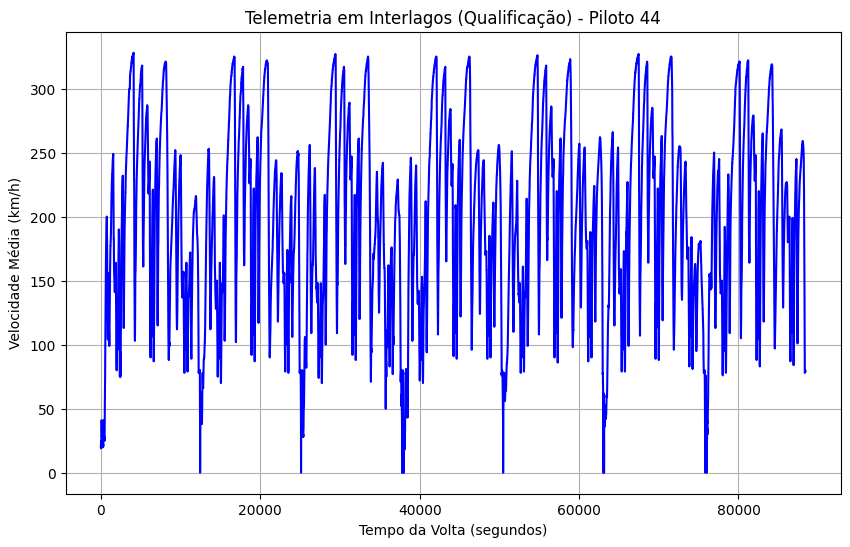

In [19]:
# Cria o gráfico de linha com o matplotlib
plt.figure(figsize=(10, 6))
plt.plot(telemetry_data_interlagos_lewis.Distance, telemetry_data_interlagos_lewis.Speed, linestyle='-', color='b')
plt.title(f'Telemetria em Interlagos (Qualificação) - Piloto {piloto_numero}')
plt.xlabel('Tempo da Volta (segundos)')
plt.ylabel('Velocidade Média (km/h)')
plt.grid(True)
plt.show()

Como podemos observar o gráfico contém todas as voltas do piloto Lewis Hamilton durante a classificação. Vamos agora selecionar apenas uma volta para visualizar o gráfico.

In [20]:
# Seleciona a volta de saída dos boxes, índice 1
volta = 1
out_lap_interlagos_lewis = laps_interlagos_lewis.pick_lap(1)
out_lap_telemetry_data_interlagos_lewis = out_lap_interlagos_lewis.get_telemetry().add_distance()

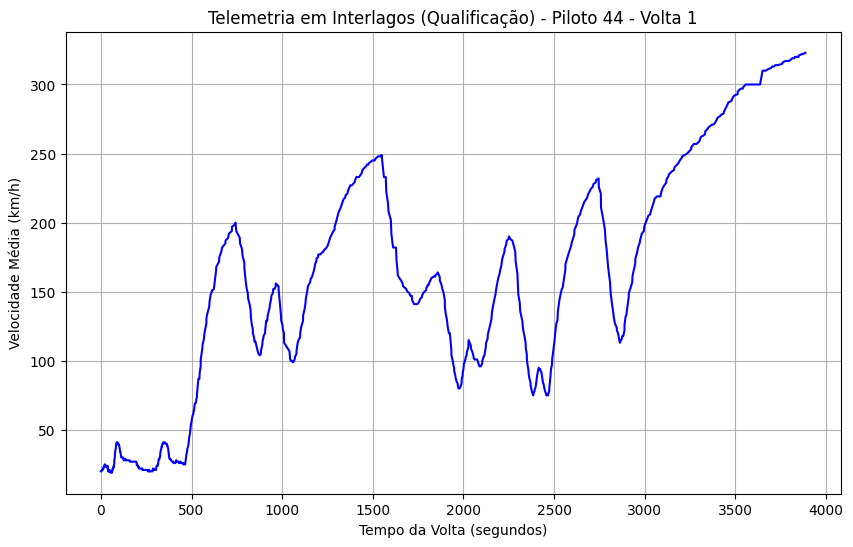

In [21]:
# Cria o gráfico de linha com o matplotlib
plt.figure(figsize=(10, 6))
plt.plot(out_lap_telemetry_data_interlagos_lewis.Distance, out_lap_telemetry_data_interlagos_lewis.Speed, linestyle='-', color='b')
plt.title(f'Telemetria em Interlagos (Qualificação) - Piloto {piloto_numero} - Volta {volta}')
plt.xlabel('Tempo da Volta (segundos)')
plt.ylabel('Velocidade Média (km/h)')
plt.grid(True)
plt.show()

In [22]:
# Seleciona a segunda volta, índice 2
volta = 2
lap_2_interlagos_lewis = laps_interlagos_lewis.pick_lap(volta)
lap_2_telemetry_data_interlagos_lewis = lap_2_interlagos_lewis.get_telemetry().add_distance()

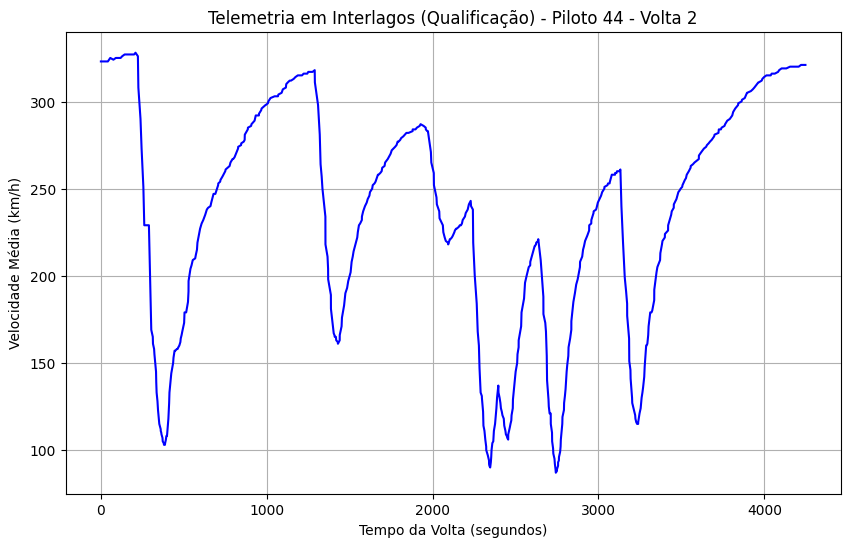

In [23]:
# Cria o gráfico de linha com o matplotlib
plt.figure(figsize=(10, 6))
plt.plot(lap_2_telemetry_data_interlagos_lewis.Distance, lap_2_telemetry_data_interlagos_lewis.Speed, linestyle='-', color='b')
plt.title(f'Telemetria em Interlagos (Qualificação) - Piloto {piloto_numero} - Volta {volta}')
plt.xlabel('Tempo da Volta (segundos)')
plt.ylabel('Velocidade Média (km/h)')
plt.grid(True)
plt.show()

In [24]:
# Seleciona a volta mais rápida
fastest_interlagos_lewis = laps_interlagos_lewis.pick_fastest()
fastest_telemetry_data_interlagos_lewis = fastest_interlagos_lewis.get_telemetry().add_distance()

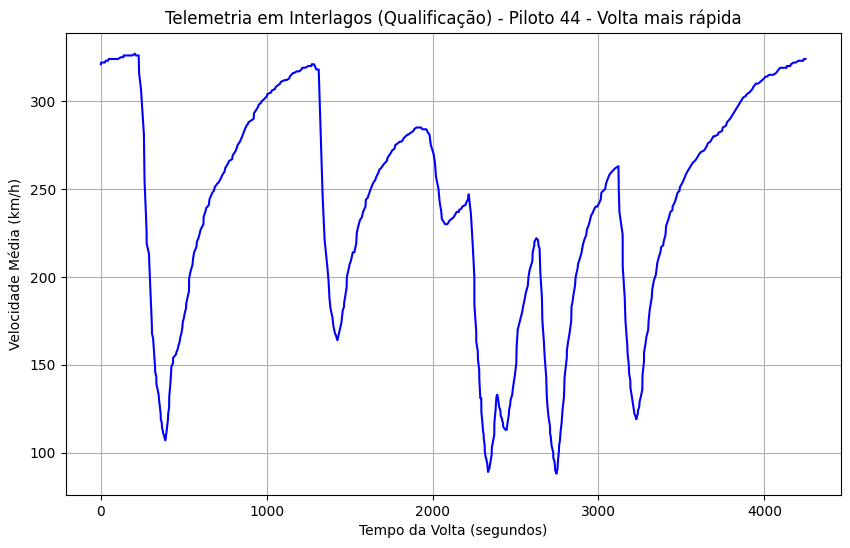

In [25]:
# Cria o gráfico de linha com o matplotlib
plt.figure(figsize=(10, 6))
plt.plot(fastest_telemetry_data_interlagos_lewis.Distance, fastest_telemetry_data_interlagos_lewis.Speed, linestyle='-', color='b')
plt.title(f'Telemetria em Interlagos (Qualificação) - Piloto {piloto_numero} - Volta mais rápida')
plt.xlabel('Tempo da Volta (segundos)')
plt.ylabel('Velocidade Média (km/h)')
plt.grid(True)
plt.show()

#### Verificando os tipos de pneu utilizados na sessão

Para isso, primeiro vamos mudar a sessão para uma sessão de corrida.

In [26]:
# Carregando os dados da corrida de Interlagos em 2021
session = ff1.get_session(2021, 'Brasil', 'R')
session.load()
laps_interlagos = session.laps

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '11', '16', '55', '10', '31', '14', '4', '5', '7', '63', '99', '22', '6', '9', '47', '3', '18']


In [27]:
# Verifica os nomes únicos na coluna "Compound"
unique_compounds = laps_interlagos.Compound.unique()
print("Nomes únicos na coluna 'Compound':", unique_compounds)

Nomes únicos na coluna 'Compound': ['MEDIUM' 'HARD' 'SOFT']


Isso significa que os compostos 'MEDIUM', 'HARD' e 'SOFT' foram utilizados durante a corrida.
Vamos verificar quais foram os compostos utilizados por cada equipe.

In [29]:
# Para cada "team", vamos determinar os "compounds" utilizados
teams = laps_interlagos.Team.unique()
# Cria o dicionário 'team_compounds' que vai armazenar as informações necessárias
team_compounds = {}

# Loop for que itera em cada 'team' único dos dados
for team in teams:
    team_laps = laps_interlagos[laps_interlagos['Team'] == team]
    team_compound_names = team_laps.Compound.unique()
    team_compounds[team] = team_compound_names

# Imprime os "compounds" utilizados por cada "team"
print("\nCompounds utilizados por cada team:")
for team, compounds in team_compounds.items():
    print(f"Team: {team}, Compounds: {', '.join(compounds)}")


Compounds utilizados por cada team:
Team: Mercedes, Compounds: MEDIUM, HARD
Team: Red Bull Racing, Compounds: MEDIUM, HARD, SOFT
Team: Ferrari, Compounds: MEDIUM, HARD
Team: AlphaTauri, Compounds: MEDIUM, HARD, SOFT
Team: Alpine, Compounds: MEDIUM, HARD
Team: McLaren, Compounds: MEDIUM, HARD
Team: Aston Martin, Compounds: MEDIUM, HARD
Team: Alfa Romeo Racing, Compounds: MEDIUM, HARD
Team: Williams, Compounds: MEDIUM, HARD
Team: Haas F1 Team, Compounds: MEDIUM, HARD


In [30]:
# Verificando a estrutura do dicionário criado
team_compounds

{'Mercedes': array(['MEDIUM', 'HARD'], dtype=object),
 'Red Bull Racing': array(['MEDIUM', 'HARD', 'SOFT'], dtype=object),
 'Ferrari': array(['MEDIUM', 'HARD'], dtype=object),
 'AlphaTauri': array(['MEDIUM', 'HARD', 'SOFT'], dtype=object),
 'Alpine': array(['MEDIUM', 'HARD'], dtype=object),
 'McLaren': array(['MEDIUM', 'HARD'], dtype=object),
 'Aston Martin': array(['MEDIUM', 'HARD'], dtype=object),
 'Alfa Romeo Racing': array(['MEDIUM', 'HARD'], dtype=object),
 'Williams': array(['MEDIUM', 'HARD'], dtype=object),
 'Haas F1 Team': array(['MEDIUM', 'HARD'], dtype=object)}

#### Análise dos dados por equipe

In [31]:
# Filtra as voltas rápidas com um percentual de desvio de até 5%
laps_interlagos_filtered = laps_interlagos.pick_quicklaps(1.05)

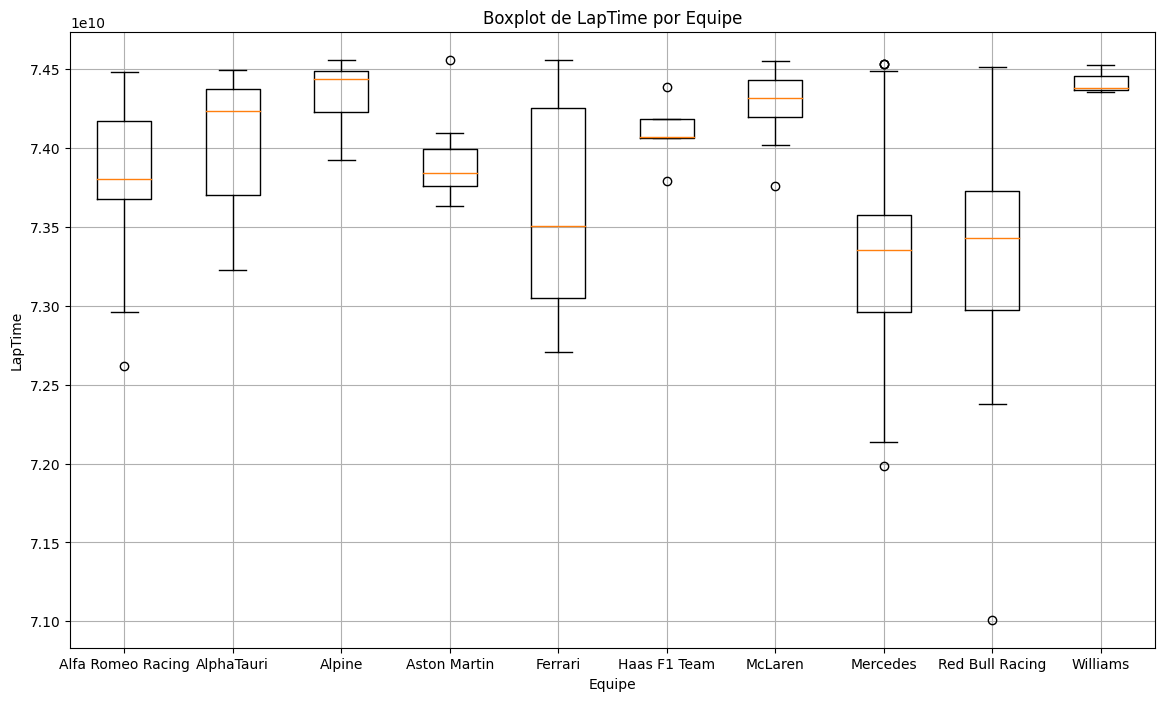

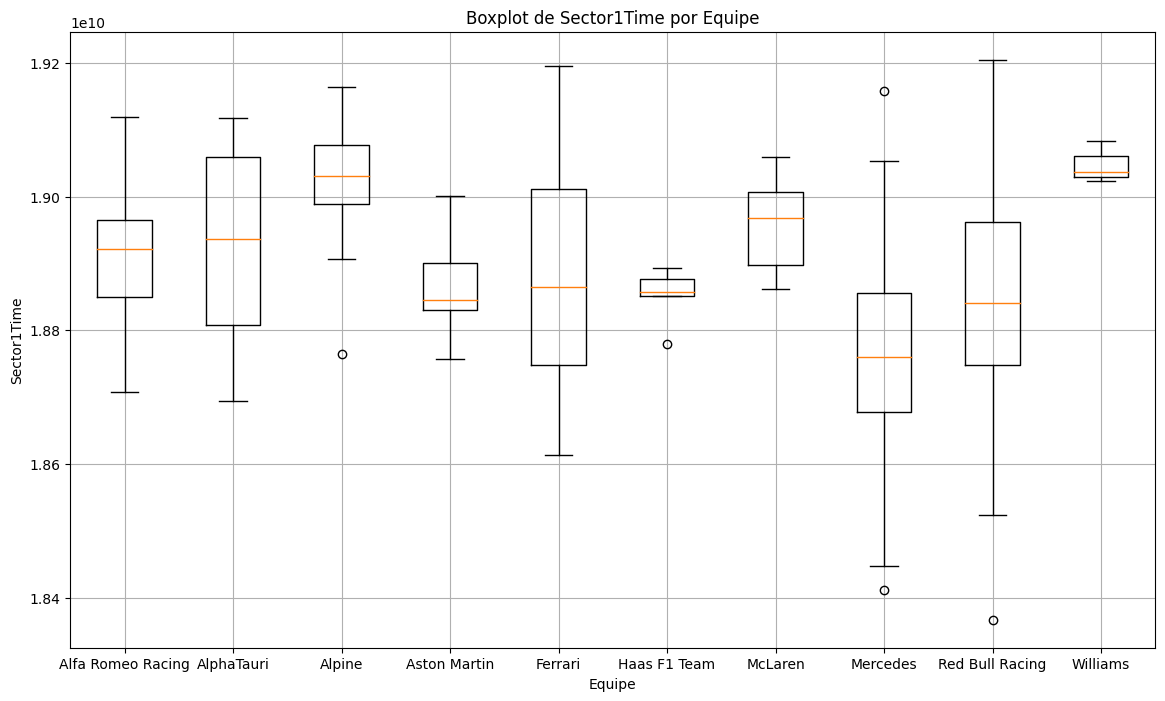

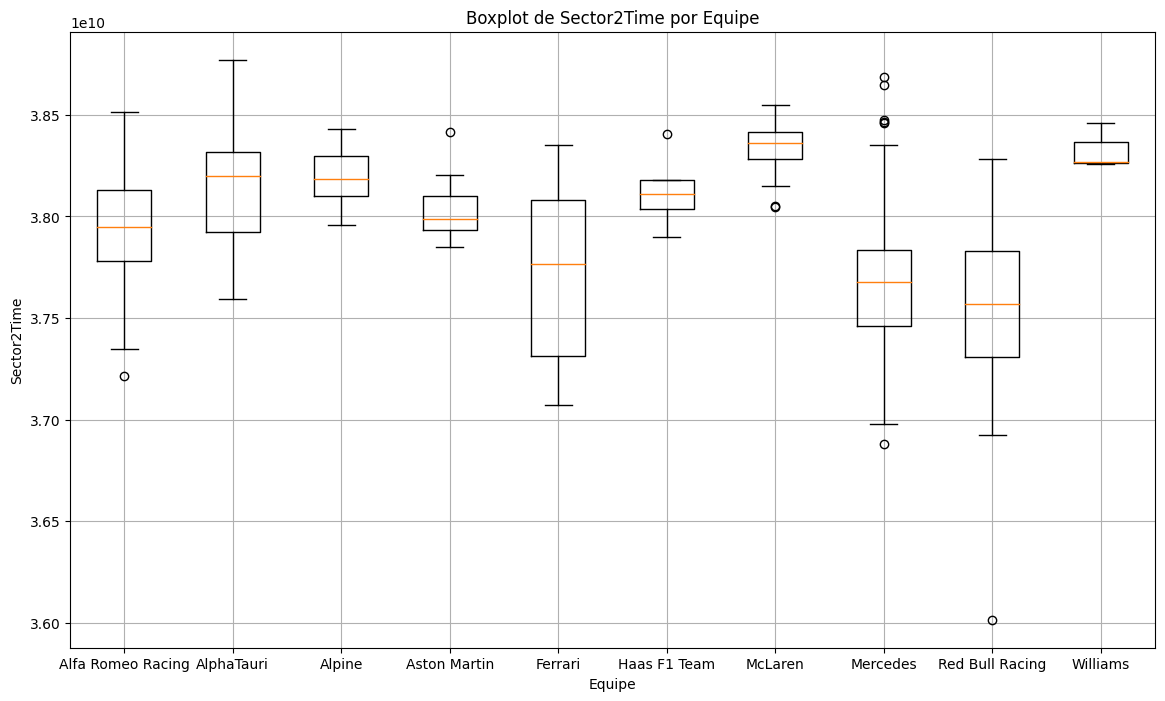

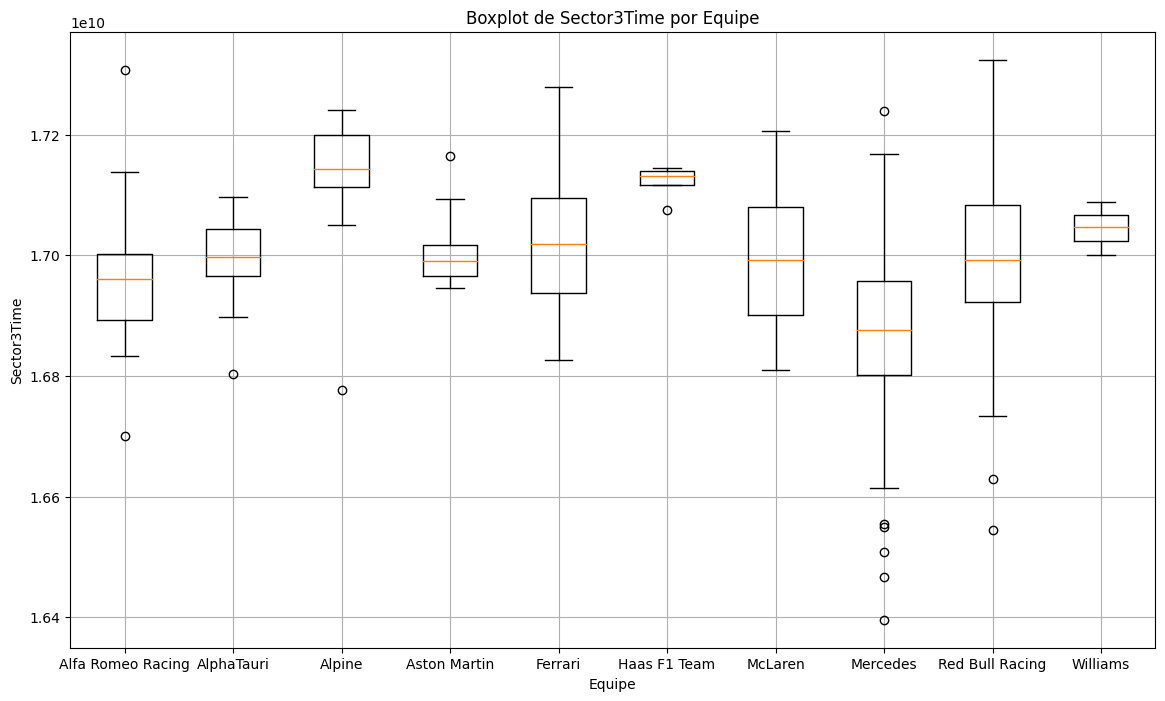

In [32]:
# Cria uma função para imprimir gráficos de boxplot
def plot_boxplot(laps_data, variavel):
    # Agrupa os dados pela coluna 'Team'
    grouped_data = laps_data.groupby('Team')[variavel]
    
    # Converte os grupos em uma lista para o boxplot
    data_to_plot = [group.values for name, group in grouped_data]
    
    # Configurações do gráfico
    plt.figure(figsize=(14, 8))
    plt.boxplot(data_to_plot, labels=grouped_data.groups.keys())
    plt.title(f'Boxplot de {variavel} por Equipe')
    plt.xlabel('Equipe')
    plt.ylabel(variavel)
    plt.grid(True)
    plt.show()

# Lista das variáveis desejadas
variaveis = ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']

# Chama a função para cada variável na lista
for variavel in variaveis:
    plot_boxplot(laps_interlagos_filtered, variavel)


#### Correlação entre gap e velocidade

Para fazer a análise da influência entre a distância do carro da frente e a velocidade precisamos extrair os dados de telemetria de um carro.

In [33]:
piloto_numero = 33
laps_interlagos_verstappen = laps_interlagos.pick_driver(piloto_numero)
laps_interlagos_verstappen

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
71,0 days 01:03:10.370000,VER,33,0 days 00:01:18.399000,1.0,1.0,0 days 00:23:39.461000,NaT,NaT,0 days 00:00:38.016000,...,True,Red Bull Racing,0 days 01:01:51.781000,2021-11-14 17:02:51.791,1,1.0,False,,False,False
72,0 days 01:04:25.050000,VER,33,0 days 00:01:14.680000,2.0,1.0,NaT,NaT,0 days 00:00:19.302000,0 days 00:00:38.122000,...,True,Red Bull Racing,0 days 01:03:10.370000,2021-11-14 17:04:10.380,1,1.0,False,,False,True
73,0 days 01:05:39.521000,VER,33,0 days 00:01:14.471000,3.0,1.0,NaT,NaT,0 days 00:00:19.090000,0 days 00:00:38.134000,...,True,Red Bull Racing,0 days 01:04:25.050000,2021-11-14 17:05:25.060,1,1.0,False,,False,True
74,0 days 01:06:54.234000,VER,33,0 days 00:01:14.713000,4.0,1.0,NaT,NaT,0 days 00:00:19.121000,0 days 00:00:38.283000,...,True,Red Bull Racing,0 days 01:05:39.521000,2021-11-14 17:06:39.531,1,1.0,False,,False,True
75,0 days 01:08:08.894000,VER,33,0 days 00:01:14.660000,5.0,1.0,NaT,NaT,0 days 00:00:19.185000,0 days 00:00:38.312000,...,True,Red Bull Racing,0 days 01:06:54.234000,2021-11-14 17:07:54.244,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0 days 02:29:27.171000,VER,33,0 days 00:01:13.958000,67.0,5.0,NaT,NaT,0 days 00:00:18.978000,0 days 00:00:37.897000,...,True,Red Bull Racing,0 days 02:28:13.213000,2021-11-14 18:29:13.223,1,2.0,False,,False,True
138,0 days 02:30:41.596000,VER,33,0 days 00:01:14.425000,68.0,5.0,NaT,NaT,0 days 00:00:18.985000,0 days 00:00:38.207000,...,True,Red Bull Racing,0 days 02:29:27.171000,2021-11-14 18:30:27.181,1,2.0,False,,False,True
139,0 days 02:31:55.985000,VER,33,0 days 00:01:14.389000,69.0,5.0,NaT,NaT,0 days 00:00:19.205000,0 days 00:00:37.997000,...,True,Red Bull Racing,0 days 02:30:41.596000,2021-11-14 18:31:41.606,1,2.0,False,,False,True
140,0 days 02:33:10.392000,VER,33,0 days 00:01:14.407000,70.0,5.0,NaT,NaT,0 days 00:00:19.089000,0 days 00:00:38.098000,...,True,Red Bull Racing,0 days 02:31:55.985000,2021-11-14 18:32:55.995,1,2.0,False,,False,True


In [34]:
# Extrai os dados de telemetria para todas as voltas do piloto escolhido
telemetry_data_interlagos_verstappen = laps_interlagos_verstappen.get_telemetry()
telemetry_data_interlagos_verstappen

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2021-11-14 17:02:51.791,0 days 01:01:51.781000,,0.000000,0 days 00:00:00,10936,0,1,15,True,1,interpolation,0.006130,2.037916e-08,OnTrack,-4098,-2470,7776
3,2021-11-14 17:02:51.900,0 days 01:01:51.890000,,0.000000,0 days 00:00:00.109000,10973,0,1,15,True,1,car,0.000000,0.000000e+00,OnTrack,-4098,-2470,7776
4,2021-11-14 17:02:51.985,0 days 01:01:51.975000,,0.000000,0 days 00:00:00.194000,10763,0,1,15,True,1,pos,-0.014668,-4.876373e-08,OnTrack,-4099,-2470,7776
5,2021-11-14 17:02:52.140,0 days 01:01:52.130000,,0.000000,0 days 00:00:00.349000,10553,0,1,15,True,1,car,0.000000,0.000000e+00,OnTrack,-4099,-2469,7775
6,2021-11-14 17:02:52.205,0 days 01:01:52.195000,,0.000000,0 days 00:00:00.414000,9713,2,1,15,True,1,pos,0.058663,1.950223e-07,OnTrack,-4099,-2470,7776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48241,2021-11-14 18:35:24.955,0 days 02:34:24.945000,,1033.576667,0 days 01:32:33.164000,10910,303,8,100,False,0,car,300762.090556,9.998668e-01,OnTrack,-4279,-1751,7754
48242,2021-11-14 18:35:24.962,0 days 02:34:24.952000,,1033.576667,0 days 01:32:33.171000,10910,302,8,100,False,0,pos,300762.679296,9.998688e-01,OnTrack,-4278,-1758,7755
48243,2021-11-14 18:35:25.182,0 days 02:34:25.172000,,1033.576667,0 days 01:32:33.391000,10910,302,8,100,False,0,pos,300781.137932,9.999301e-01,OnTrack,-4229,-1956,7762
48244,2021-11-14 18:35:25.195,0 days 02:34:25.185000,,1033.576667,0 days 01:32:33.404000,10910,302,8,100,False,0,car,300782.223889,9.999337e-01,OnTrack,-4226,-1967,7762


In [35]:
# Verifica todas as informações carregadas em 'telemetry_data_interlagos_verstappen'
telemetry_data_interlagos_verstappen.columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

Vamos criar uma função que cria um gráfico de dispersão com matplotlib para podermos reaproveitá-la em outros momentos também.

In [36]:
def plot_scatter(data, x_column, y_column, x_label, y_label, title):
    """
    Cria um gráfico de dispersão.
    
    Args:
    data (DataFrame): Os dados para o gráfico.
    x_column (str): Nome da coluna para o eixo x.
    y_column (str): Nome da coluna para o eixo y.
    x_label (str): Rótulo do eixo x.
    y_label (str): Rótulo do eixo y.
    title (str): Título do gráfico.
    """
    plt.figure(figsize=(14, 8))
    plt.scatter(data[x_column], data[y_column], alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.show()


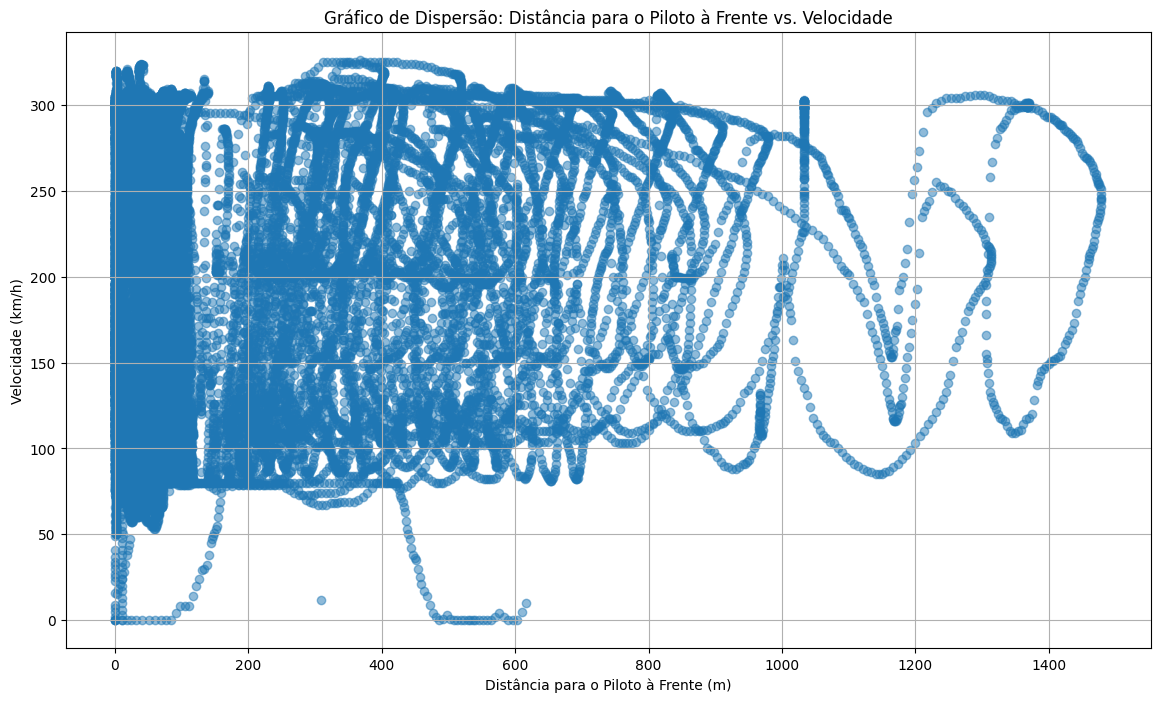

In [37]:
# Exemplo de uso da função
plot_scatter(telemetry_data_interlagos_verstappen, 'DistanceToDriverAhead', 'Speed', 'Distância para o Piloto à Frente (m)', 'Velocidade (km/h)', 'Gráfico de Dispersão: Distância para o Piloto à Frente vs. Velocidade')

O gráfico acima possui muita informação e sua análise fica difícil, é neste momento que o conhecimento do problema é essencial. Podemos filtrar os dados para analisar apenas velocidades maiores e também distâncias menores, que é o ponto de interesse. Vamos fazer isso no próximo bloco e reaproveitar a função criada.

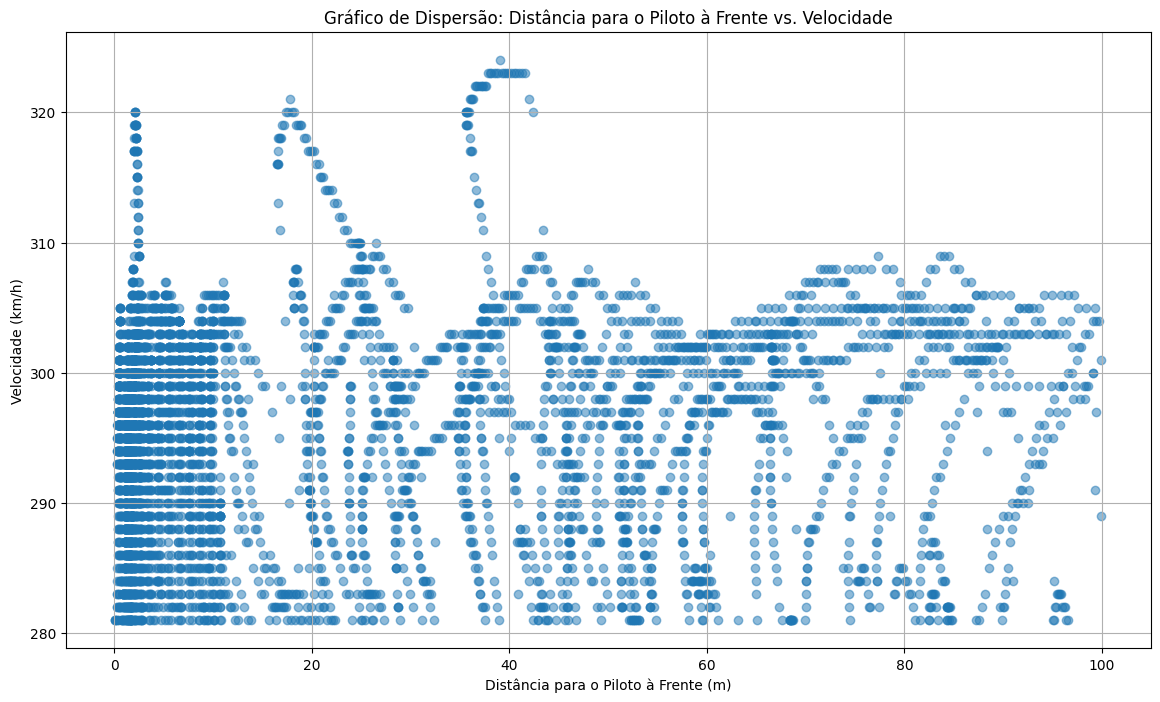

In [38]:
# Filtra os dados para Speed > 280 e DistanceToDriverAhead < 100
dados_filtrados = telemetry_data_interlagos_verstappen[(telemetry_data_interlagos_verstappen['Speed'] > 280) & (telemetry_data_interlagos_verstappen['DistanceToDriverAhead'] < 100)]

# Exemplo de uso da função com os dados filtrados
plot_scatter(dados_filtrados, 'DistanceToDriverAhead', 'Speed', 'Distância para o Piloto à Frente (m)', 'Velocidade (km/h)', 'Gráfico de Dispersão: Distância para o Piloto à Frente vs. Velocidade')

Com os dados filtrados a análise fica mais clara, podemos ver 3 picos de velocidade em distâncias próximas de 3, 18 e 39 metros. Apesar disso, não podemos concluir nem perceber uma tendência clara que correlacione, por exemplo, velocidades maiores observadas em determinadas distâncias de gap.

Isso nos faz pensar que talvez estes picos de velocidade possam estar associados ao DRS, portanto vamos observar o que a documentação oficial do Fast F1 nos diz sobre essa informação:

- DRS (int): 0-14
    - 0 = Desativado
    - 1 = Desativado
    - 2 = (?)
    - 3 = (?)
    - 8 = Detectado, elegível uma vez na Zona de Ativação (Às vezes observado)
    - 10 = Ativado (Distinção desconhecida)
    - 12 = Ativado (Distinção desconhecida)
    - 14 = Ativado (Distinção desconhecida)

Essa informação nos diz que DRS com valores de 0 e 1 significam 'Desativado', vamos adicionar este filtro e plotar novamente o gráfico.

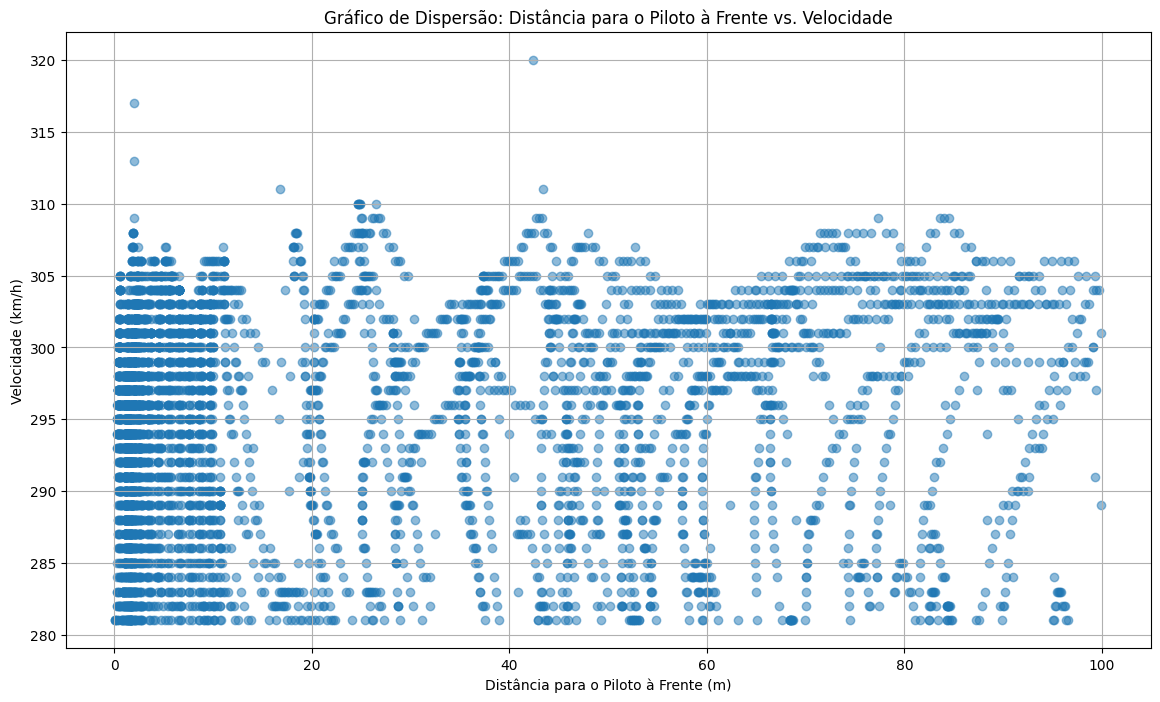

In [39]:
# Filtra os dados para Speed > 280, DistanceToDriverAhead < 100 e DRS igual a 0 ou 1
dados_filtrados = telemetry_data_interlagos_verstappen[
    (telemetry_data_interlagos_verstappen['Speed'] > 280) & 
    (telemetry_data_interlagos_verstappen['DistanceToDriverAhead'] < 100) & 
    ((telemetry_data_interlagos_verstappen['DRS'] == 0) | (telemetry_data_interlagos_verstappen['DRS'] == 1))
]

# Exemplo de uso da função com os dados filtrados
plot_scatter(dados_filtrados, 'DistanceToDriverAhead', 'Speed', 'Distância para o Piloto à Frente (m)', 'Velocidade (km/h)', 'Gráfico de Dispersão: Distância para o Piloto à Frente vs. Velocidade')

Agora fica mais claro ainda e, podemos observar que, apesar de não encontrar uma tendância clara entre os dados, dois 'outliers' nos chamam a atenção: dois pontos com velocidade maior que 315 km/h.

O trabalho de quem analisa os dados é justamente este, se questionar se estes dados representam ou não algo verdadeiro, se foi algum tipo de erro ou se pelo contrário, é uma informação relevante que deve ser analisada e entendida. Essa mentalidade é fundamental no momento da análise dos dados e vai fazer com que você repita este ciclo de análise por diversas vezes durante o trabalho, com variáveis diferentes.

Lembrando que estes dados representam todos os pontos de velocidade durante uma volta, o que pode prejudicar a análise para encontrar tendências. Utilizar as velocidades em um único ponto específico (por exemplo a linha de chegada) pode ser mais conclusivo. Porém o importante aqui é o entendimento do que somos capaz de analisar a partir destes dados.

#### Analisando os dados do clima

In [40]:
# Importa a biblioteca pandas para converter tipos de colunas
import pandas as pd

Além dos dados de telemetria, também podemos extrair dados do clima durante uma sessão específica, vamos extrair esses dados obtidos durante a corrida em Interlagos 2021.

In [41]:
weather_race_interlagos = laps_interlagos.get_weather_data()
weather_race_interlagos

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
62,0 days 01:02:18.594000,22.8,61.9,927.0,False,52.1,164,0.5
63,0 days 01:03:18.593000,22.8,61.9,927.0,False,52.1,164,0.5
65,0 days 01:05:18.584000,23.1,61.6,927.0,False,51.7,193,0.8
66,0 days 01:06:18.603000,23.1,62.9,927.0,False,51.9,339,0.5
67,0 days 01:07:18.602000,23.0,62.9,927.0,False,51.9,339,0.5
...,...,...,...,...,...,...,...,...
120,0 days 02:00:18.746000,23.0,60.2,926.9,False,49.6,184,0.7
121,0 days 02:01:18.742000,22.9,60.1,926.9,False,49.6,207,0.6
123,0 days 02:03:18.753000,22.9,60.9,926.9,False,49.7,152,0.4
124,0 days 02:04:18.781000,22.9,59.1,926.8,False,49.8,167,0.3


In [42]:
# Verifica as variáveis disponívels de weather
weather_race_interlagos.columns

Index(['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp',
       'WindDirection', 'WindSpeed'],
      dtype='object')

In [43]:
# Verifica os tipos das variáveis disponívels de weather
weather_race_interlagos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1360 entries, 62 to 125
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Time           1360 non-null   timedelta64[ns]
 1   AirTemp        1360 non-null   object         
 2   Humidity       1360 non-null   object         
 3   Pressure       1360 non-null   object         
 4   Rainfall       1360 non-null   object         
 5   TrackTemp      1360 non-null   object         
 6   WindDirection  1360 non-null   object         
 7   WindSpeed      1360 non-null   object         
dtypes: object(7), timedelta64[ns](1)
memory usage: 95.6+ KB


Vamos plotar gráficos de linhas com algumas variáveis escolhidas: AirTemp, Humidity, TrackTemp e WindSpeed.

In [44]:
# Função para plotar um gráfico de linha com matplotlib
def plot_air_temp(data, x_column, y_column, x_label, y_label, title):
    """
    Cria um gráfico de linha para a variável AirTemp em função de Time.
    
    Args:
    data (DataFrame): Os dados para o gráfico.
    x_column (str): Nome da coluna para o eixo x (Time).
    y_column (str): Nome da coluna para o eixo y (AirTemp).
    x_label (str): Rótulo do eixo x.
    y_label (str): Rótulo do eixo y.
    title (str): Título do gráfico.
    """
    plt.figure(figsize=(14, 8))
    plt.plot(data[x_column], data[y_column], label=y_column, linewidth=2)
    
    # Configurações do gráfico
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

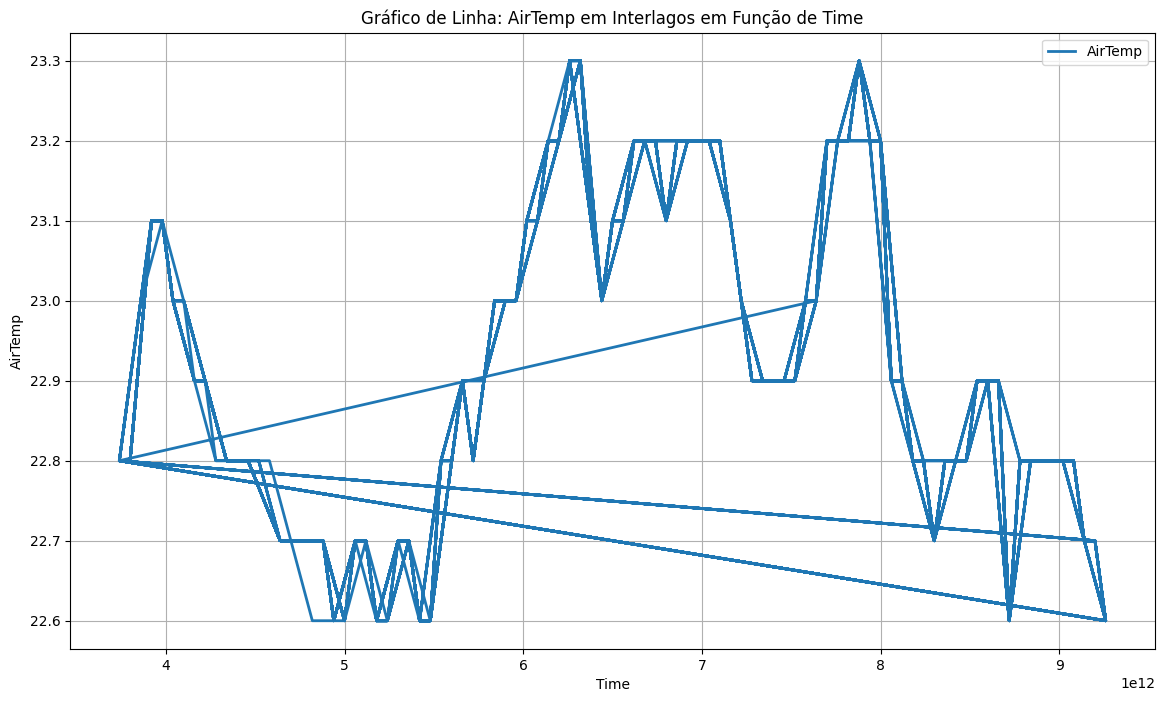

In [45]:
# Converter a coluna AirTemp para tipo numérico (float)
weather_race_interlagos['AirTemp'] = pd.to_numeric(weather_race_interlagos['AirTemp'], errors='coerce')

# Chamar a função plot_air_temp() para criar o gráfico
plot_air_temp(weather_race_interlagos, 'Time', 'AirTemp', 'Time', 'AirTemp', 'Gráfico de Linha: AirTemp em Interlagos em Função de Time')


Podemos perceber que existe algo estranho nestre gráfico, parece que as linhas estão sobrepostas, como se existissem vários ciclos de dados sendo plotados ao mesmo tempo.

Para entender melhor o que está acontecendo vamos plotar toda coluna 'AirTemp'

In [46]:
# Exibir todas as linhas da coluna AirTemp
pd.set_option('display.max_rows', None)  # Configurar o pandas para mostrar todas as linhas
print(weather_race_interlagos['AirTemp'])

62     22.8
63     22.8
65     23.1
66     23.1
67     23.0
68     23.0
70     22.9
72     22.8
74     22.8
77     22.7
78     22.7
79     22.7
81     22.7
82     22.6
84     22.7
85     22.7
86     22.6
87     22.6
89     22.7
90     22.6
91     22.6
92     22.8
94     22.9
95     22.8
96     22.9
97     23.0
99     23.0
100    23.1
101    23.1
103    23.2
104    23.3
105    23.3
107    23.0
108    23.1
109    23.1
110    23.2
111    23.2
113    23.1
114    23.2
115    23.2
116    23.2
118    23.2
119    23.1
120    23.0
122    22.9
123    22.9
124    22.9
125    22.9
126    23.0
128    23.2
129    23.2
130    23.2
131    23.3
133    23.2
134    22.9
135    22.9
136    22.8
137    22.8
139    22.8
140    22.8
141    22.8
142    22.9
143    22.9
145    22.6
146    22.8
147    22.8
148    22.8
150    22.8
151    22.8
152    22.7
153    22.7
62     22.8
63     22.8
65     23.1
66     23.1
67     23.0
68     23.0
70     22.9
72     22.8
74     22.8
77     22.7
78     22.7
79     22.7
81  

Observando todas as amostras é possível ver ciclos de dados que se repetem, do índice 62 ao 153. Vamos verificar agora a coluna 'Time'

In [47]:
# Exibir todas as linhas da coluna Time
print(weather_race_interlagos['Time'])

62    0 days 01:02:18.594000
63    0 days 01:03:18.593000
65    0 days 01:05:18.584000
66    0 days 01:06:18.603000
67    0 days 01:07:18.602000
68    0 days 01:08:18.625000
70    0 days 01:10:18.621000
72    0 days 01:12:18.617000
74    0 days 01:14:18.619000
77    0 days 01:17:18.619000
78    0 days 01:18:18.617000
79    0 days 01:19:18.617000
81    0 days 01:21:18.616000
82    0 days 01:22:18.618000
84    0 days 01:24:18.634000
85    0 days 01:25:18.638000
86    0 days 01:26:18.638000
87    0 days 01:27:18.645000
89    0 days 01:29:18.682000
90    0 days 01:30:18.700000
91    0 days 01:31:18.694000
92    0 days 01:32:18.712000
94    0 days 01:34:18.713000
95    0 days 01:35:18.711000
96    0 days 01:36:18.727000
97    0 days 01:37:18.749000
99    0 days 01:39:18.742000
100   0 days 01:40:18.754000
101   0 days 01:41:18.744000
103   0 days 01:43:18.744000
104   0 days 01:44:18.760000
105   0 days 01:45:18.738000
107   0 days 01:47:18.745000
108   0 days 01:48:18.743000
109   0 days 0

Veja que o mesmo acontece, mas agora para saber o número de dados de cada ciclo, vamos resetar o index, já que a contagem de números, neste caso, de 62 até 154 não é contínua.

In [48]:
# Exibir todas as linhas da coluna Time
print(weather_race_interlagos['Time'].reset_index(drop=True, inplace=False))

0      0 days 01:02:18.594000
1      0 days 01:03:18.593000
2      0 days 01:05:18.584000
3      0 days 01:06:18.603000
4      0 days 01:07:18.602000
5      0 days 01:08:18.625000
6      0 days 01:10:18.621000
7      0 days 01:12:18.617000
8      0 days 01:14:18.619000
9      0 days 01:17:18.619000
10     0 days 01:18:18.617000
11     0 days 01:19:18.617000
12     0 days 01:21:18.616000
13     0 days 01:22:18.618000
14     0 days 01:24:18.634000
15     0 days 01:25:18.638000
16     0 days 01:26:18.638000
17     0 days 01:27:18.645000
18     0 days 01:29:18.682000
19     0 days 01:30:18.700000
20     0 days 01:31:18.694000
21     0 days 01:32:18.712000
22     0 days 01:34:18.713000
23     0 days 01:35:18.711000
24     0 days 01:36:18.727000
25     0 days 01:37:18.749000
26     0 days 01:39:18.742000
27     0 days 01:40:18.754000
28     0 days 01:41:18.744000
29     0 days 01:43:18.744000
30     0 days 01:44:18.760000
31     0 days 01:45:18.738000
32     0 days 01:47:18.745000
33     0 d

Aqui podemos observar que o índice 71 já é um início de um novo ciclo, desta forma vamos utilizar apenas 1 ciclo, do 0 ao 70 para plotar os gráficos dessas variáveis durante o tempo.

Primeiro vamos filtrar estes dados.

In [49]:
# Filtrando as linhas dos índices 0 a 70
filtered_weather_race_interlagos = weather_race_interlagos[0:71]

Agora vamos criar outra função, que faça vários plot das variáveis ao mesmo tempo.

In [50]:
# Função para plotar os subplots
def plot_weather_subplots(data, variables, x_column, y_label, title):
    """
    Cria subplots com as variáveis fornecidas em quatro linhas na mesma coluna.
    
    Args:
    data (DataFrame): Os dados para os subplots.
    variables (list): Lista das variáveis a serem plotadas.
    x_column (str): Nome da coluna para o eixo x.
    y_label (str): Rótulo do eixo y.
    title (str): Título dos subplots.
    """
    num_plots = len(variables)
    fig, axes = plt.subplots(num_plots, 1, figsize=(14, 8 * num_plots), sharex=True)
    
    for i, variable in enumerate(variables):
        axes[i].plot(data[x_column], data[variable], label=variable, linewidth=2)
        axes[i].set_ylabel(y_label)
        axes[i].set_title(title)
        axes[i].legend()
        axes[i].grid(True)
    
    plt.xlabel(x_column)
    plt.show()

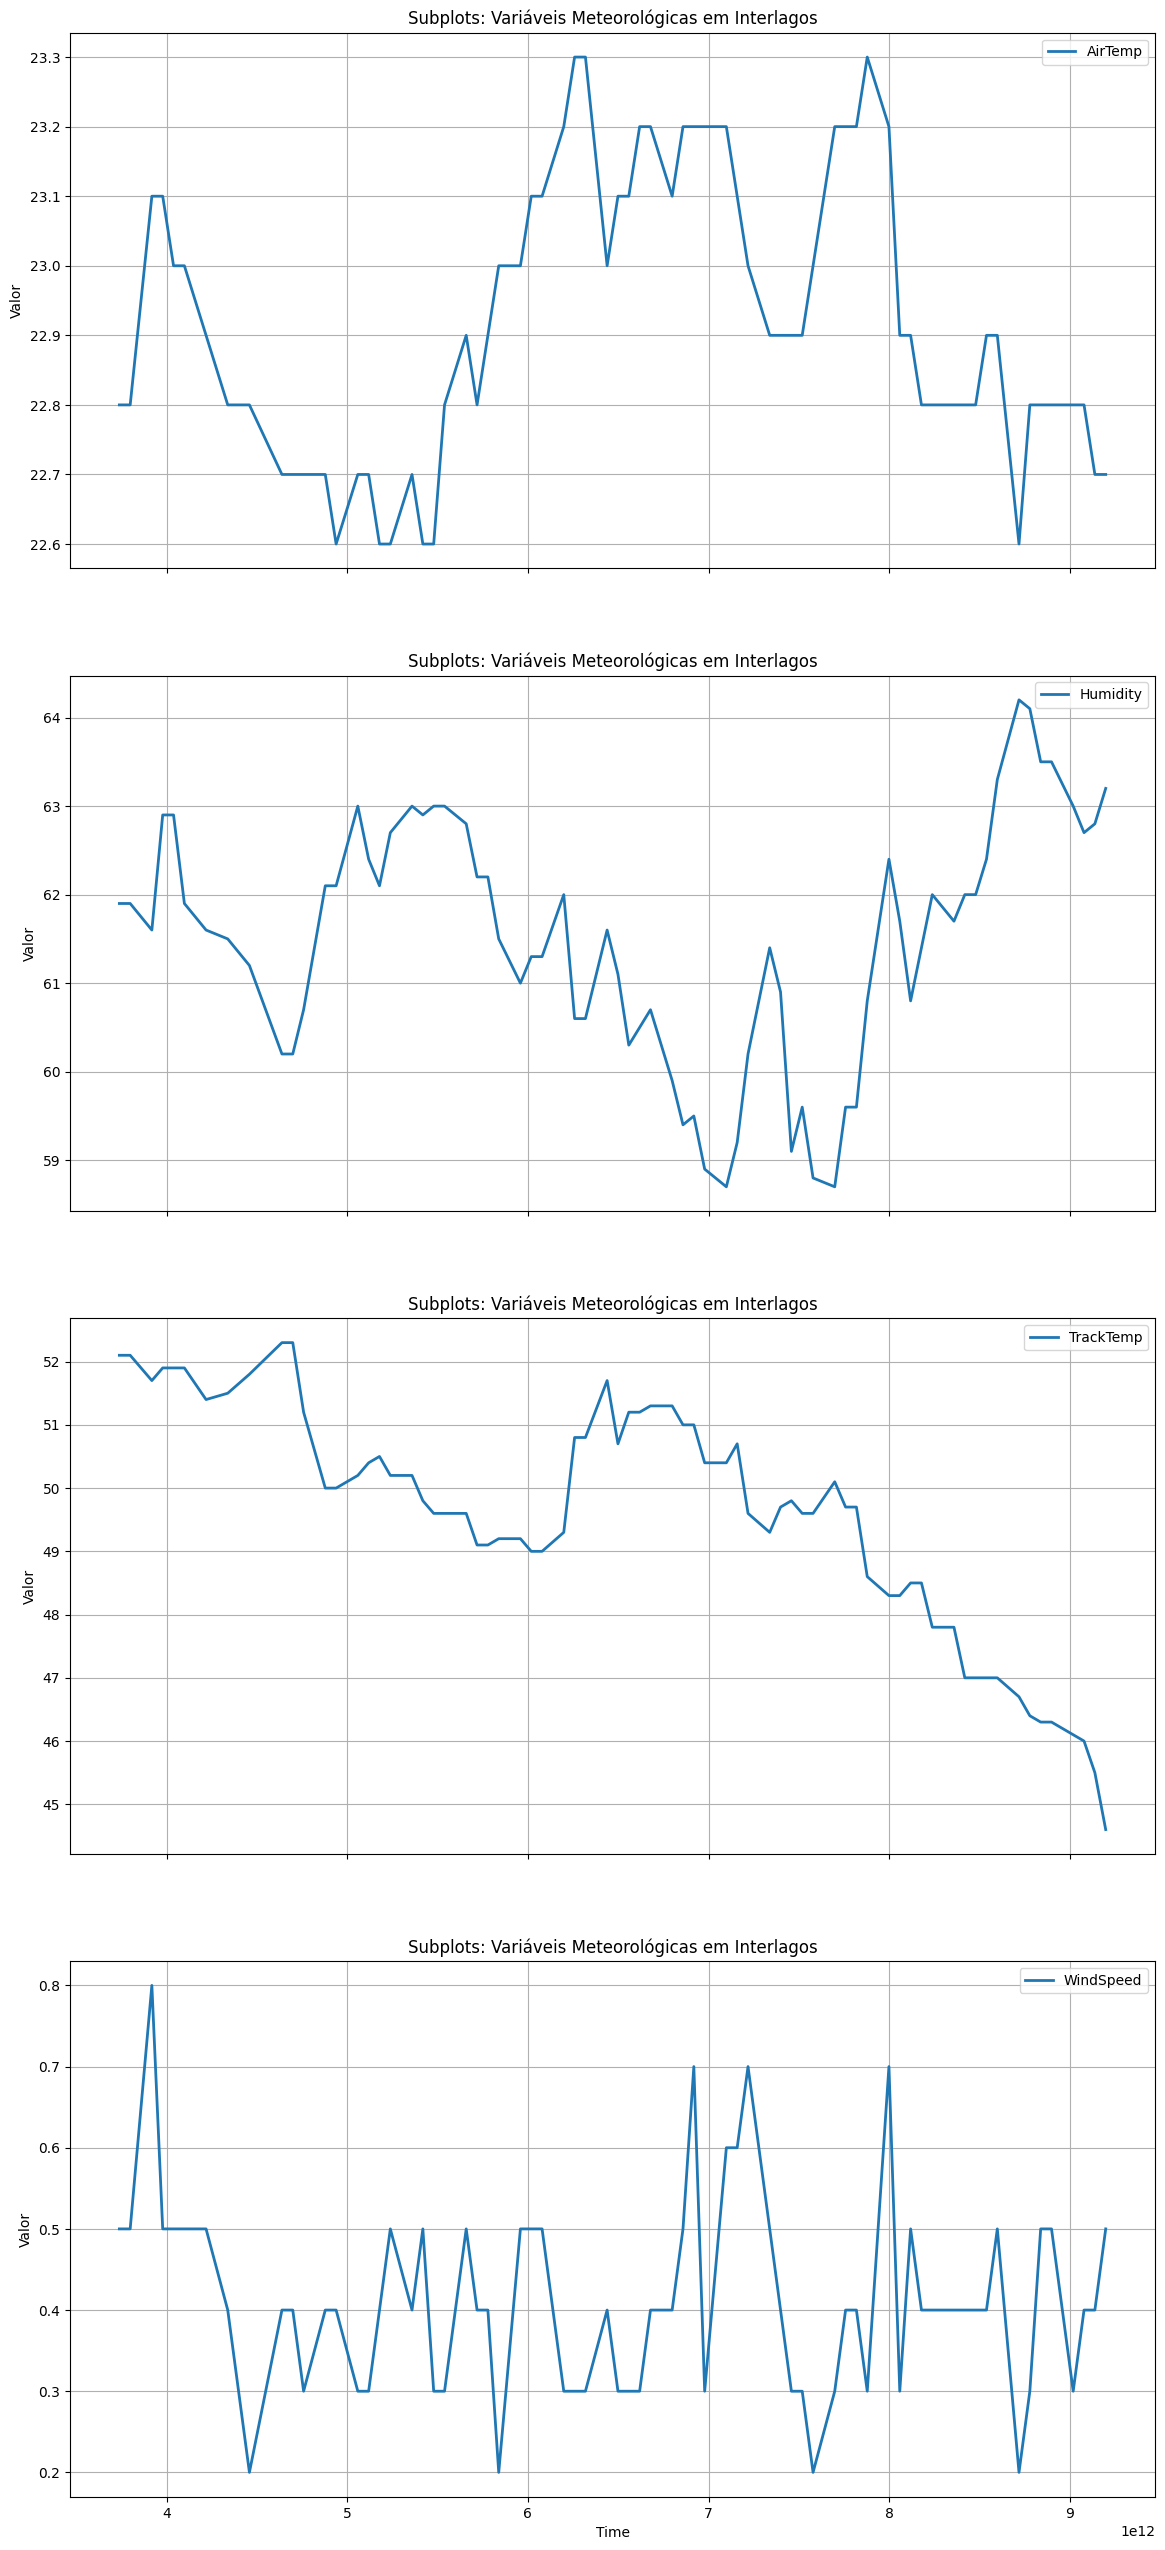

In [51]:
# Variáveis a serem plotadas
variables_to_plot = ['AirTemp', 'Humidity', 'TrackTemp', 'WindSpeed']

# Nome da coluna para o eixo x
x_column = 'Time'

# Rótulo do eixo y
y_label = 'Valor'

# Título dos subplots
title = 'Subplots: Variáveis Meteorológicas em Interlagos'

# Chamar a função para criar os subplots
plot_weather_subplots(filtered_weather_race_interlagos, variables_to_plot, x_column, y_label, title)

Agora sim conseguimos observar a variação destas informações sobre o clima através dos gráficos de linha.

Mas o ponto importante aqui é o seguinte, como usar essas informações para alguma análise em Motorsport?

Se pensarmos apenas neste conjunto de dados nossas opções podem ser limitadas, mas se pensarmos em combinar conjuntos de dados, vamos criar possibilidades de análise. Por exemplo, podemos utilizar os dados do 'laps_interlagos' que é desta mesma sessão para combinar informações como velocidade por temperatura do ar ou velocidade do vento. Podemos também tentar correlacionar o tempo de volta com a temperatura da pista.

Então precisamos aprender a unir essas informações para criarmos os gráficos de dispersão (usado para correlacionar variáveis), mas primeiro vamos verificar se a mesma periodicidade observada aqui é também observada em 'laps_interlagos'.

Vamos fazer isso analisando a coluna 'Time' do 'laps_interlagos'.

In [52]:
# Exibir todas as linhas da coluna Time
print(laps_interlagos['Time'].reset_index(drop=True, inplace=False))

0      0 days 01:03:15.240000
1      0 days 01:04:30.915000
2      0 days 01:05:45.169000
3      0 days 01:06:59.476000
4      0 days 01:08:13.648000
5      0 days 01:09:41.249000
6      0 days 01:11:40.866000
7      0 days 01:13:52.603000
8      0 days 01:16:20.230000
9      0 days 01:17:36.210000
10     0 days 01:18:50.817000
11     0 days 01:20:25.800000
12     0 days 01:22:05.538000
13     0 days 01:23:29.895000
14     0 days 01:24:44.232000
15     0 days 01:25:58.766000
16     0 days 01:27:13.513000
17     0 days 01:28:29.229000
18     0 days 01:29:43.529000
19     0 days 01:30:57.953000
20     0 days 01:32:12.486000
21     0 days 01:33:27.017000
22     0 days 01:34:41.792000
23     0 days 01:35:56.916000
24     0 days 01:37:11.892000
25     0 days 01:38:30.568000
26     0 days 01:40:00.370000
27     0 days 01:41:13.734000
28     0 days 01:42:26.896000
29     0 days 01:43:51.208000
30     0 days 01:45:10.605000
31     0 days 01:46:23.830000
32     0 days 01:47:37.121000
33     0 d

Assim como observamos em 'weather_race_interlagos' existe a mesma peridiocidade entre os dados a cada ciclo de índice 0 a 70. Portanto agora o que vamos fazer é apenas concatenar os dados de 'weather_race_interlagos' com 'laps_interlagos', sem filtrá-los, já que agora não queremos ver seus valores ao longo do tempo, mas sim analisar uma possível correlação entre seus valores.

Vamos concatenar os dados 'laps_interlagos' e 'weather_race_interlagos'.

In [53]:
# Resetando os índices dos DataFrames
laps_interlagos = laps_interlagos.reset_index(drop=True)
weather_race_interlagos = weather_race_interlagos.reset_index(drop=True)


# Concatena os DataFrames ao longo das colunas
merged_data_race_interlagos = pd.concat([laps_interlagos, weather_race_interlagos], axis=1)

# Verifican as dimensões do DataFrame resultante
print(f'Dimensão de laps_interlagos: {laps_interlagos.shape}') 
print(f'Dimensão de weather_race_interlagos: {weather_race_interlagos.shape}') 
print(f'Dimensão dos dados concatenados: {merged_data_race_interlagos.shape}')  # Deve imprimir (1360, n), onde n é o número total de colunas após a concatenação


Dimensão de laps_interlagos: (1360, 31)
Dimensão de weather_race_interlagos: (1360, 8)
Dimensão dos dados concatenados: (1360, 39)


Podemos observar pelas dimensões de linhas e colunas que agora temos um novo banco de dados concatenado que possuim as seguintes informações.

In [ ]:
merged_data_race_interlagos

In [55]:
merged_data_race_interlagos.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'Time', 'AirTemp', 'Humidity',
       'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed'],
      dtype='object')

In [56]:
merged_data_race_interlagos.info()

<class 'fastf1.core.Laps'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1360 non-null   timedelta64[ns]
 1   Driver              1360 non-null   object         
 2   DriverNumber        1360 non-null   object         
 3   LapTime             1360 non-null   timedelta64[ns]
 4   LapNumber           1360 non-null   float64        
 5   Stint               1360 non-null   float64        
 6   PitOutTime          99 non-null     timedelta64[ns]
 7   PitInTime           81 non-null     timedelta64[ns]
 8   Sector1Time         1340 non-null   timedelta64[ns]
 9   Sector2Time         1360 non-null   timedelta64[ns]
 10  Sector3Time         1360 non-null   timedelta64[ns]
 11  Sector1SessionTime  1337 non-null   timedelta64[ns]
 12  Sector2SessionTime  1360 non-null   timedelta64[ns]
 13  Sector3SessionTime  1360 non-null   timedelt

Vamos criar uma função que tenha subplots agora para gráficos de dispersão.

In [58]:
# Essa função não será usada neste momento, mas deixamos aqui para modelo se necessário

def plot_scatter_subplots(data, x_column, y_columns, x_label, y_labels, titles):
    """
    Cria subplots de gráficos de dispersão em linhas separadas.
    
    Args:
    data (DataFrame): Os dados para o gráfico.
    x_column (str): Nome da coluna para o eixo x em todos os subplots.
    y_columns (list): Lista de nomes das colunas para o eixo y nos subplots.
    x_label (str): Rótulo do eixo x.
    y_labels (list): Lista de rótulos para o eixo y nos subplots.
    titles (list): Lista de títulos para os subplots.
    """
    num_plots = len(y_columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(14, 28))
    
    for i in range(num_plots):
        axes[i].scatter(data[x_column], data[y_columns[i]], alpha=0.5)
        axes[i].set_xlabel(x_label)
        axes[i].set_ylabel(y_labels[i])
        axes[i].set_title(titles[i])
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

Assim como fizemos anteriormente, vamos filtrar os dados a partir de velocidades maiores, para facilitar a análise.

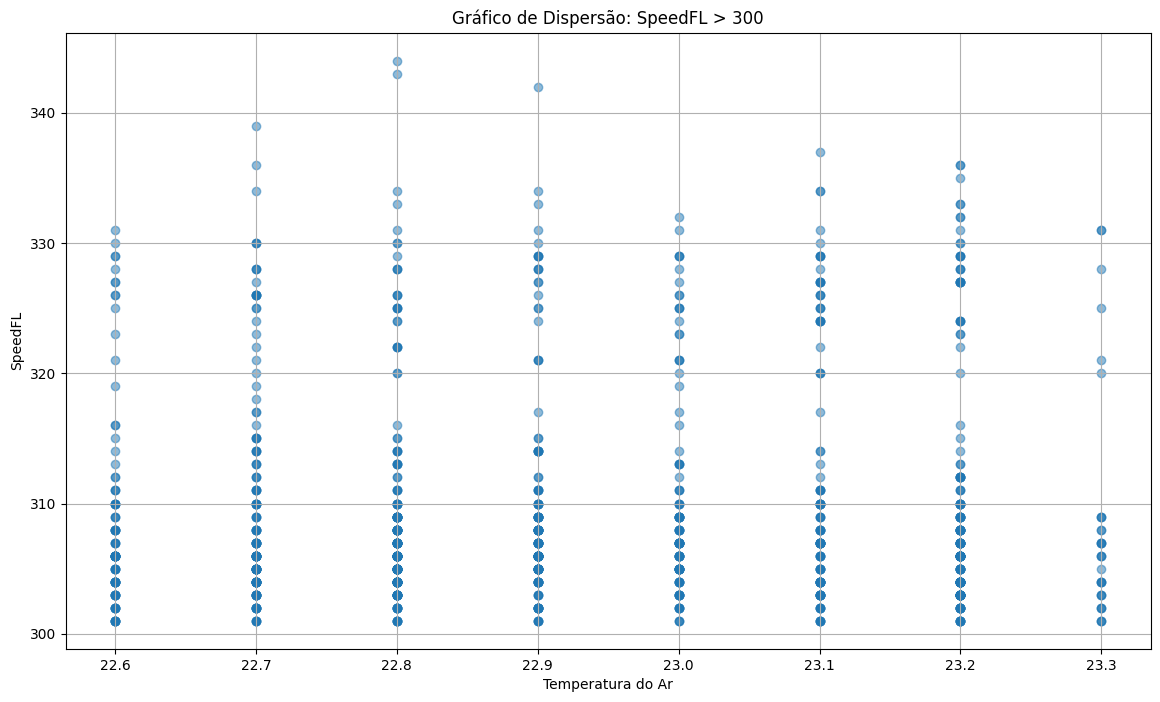

In [60]:
filtered_speedFL = merged_data_race_interlagos.query('SpeedFL > 300')
plot_scatter(filtered_speedFL, 'AirTemp', 'SpeedFL', 'Temperatura do Ar', 'SpeedFL', 'Gráfico de Dispersão: SpeedFL > 300')

Podemos ver que as maiores velocidades estão entre as temperaturas 22,7 e 22,9 °C.

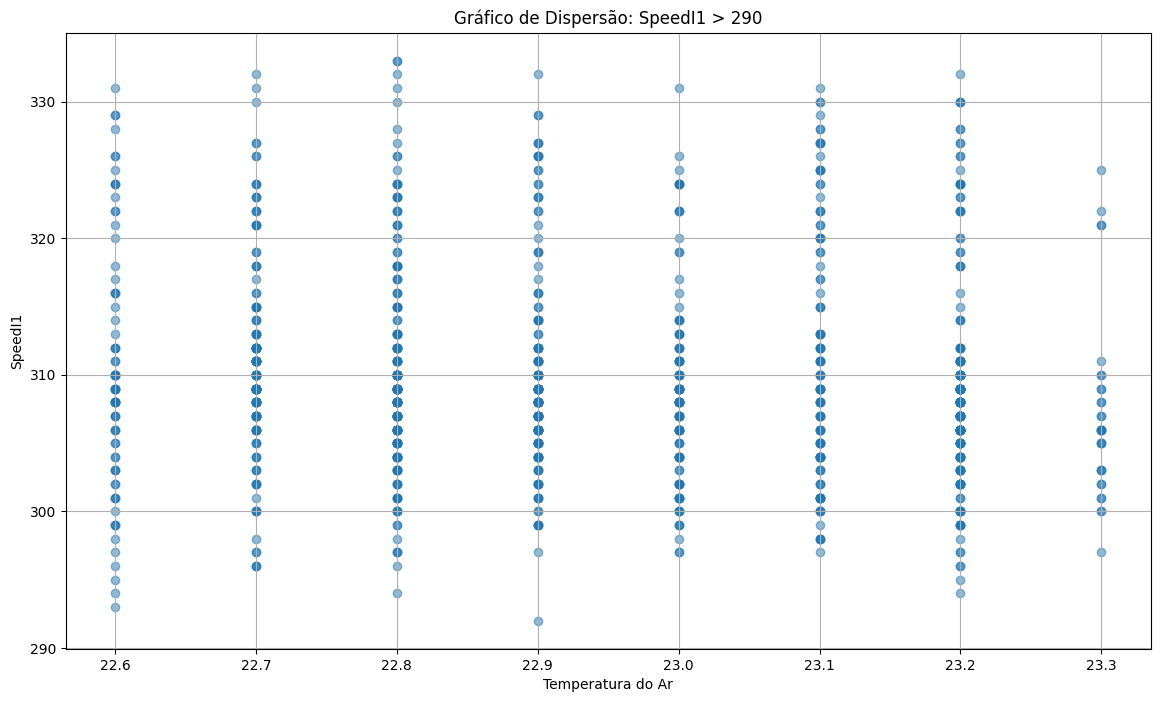

In [59]:
filtered_speedI1 = merged_data_race_interlagos.query('SpeedI1 > 290')
plot_scatter(filtered_speedI1, 'AirTemp', 'SpeedI1', 'Temperatura do Ar', 'SpeedI1', 'Gráfico de Dispersão: SpeedI1 > 290')

Não observamos uma tendência clara nos dados, mas é possível ver que em 23,3 °C as velocidades são mais baixas.

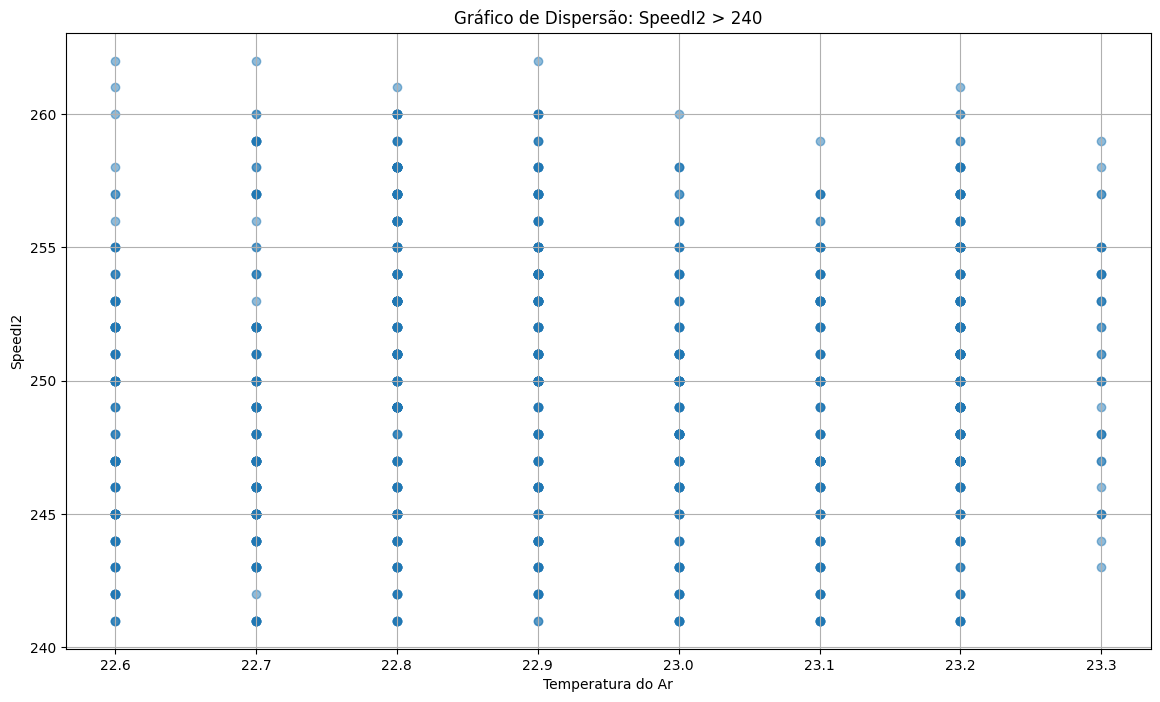

In [60]:
filtered_speedI2 = merged_data_race_interlagos.query('SpeedI2 > 240')
plot_scatter(filtered_speedI2, 'AirTemp', 'SpeedI2', 'Temperatura do Ar', 'SpeedI2', 'Gráfico de Dispersão: SpeedI2 > 240')

Assim como vimos em SpeedI1, não observamos uma tendência clara nos dados, mas é possível ver que em 23,3 °C as velocidades são mais baixas.

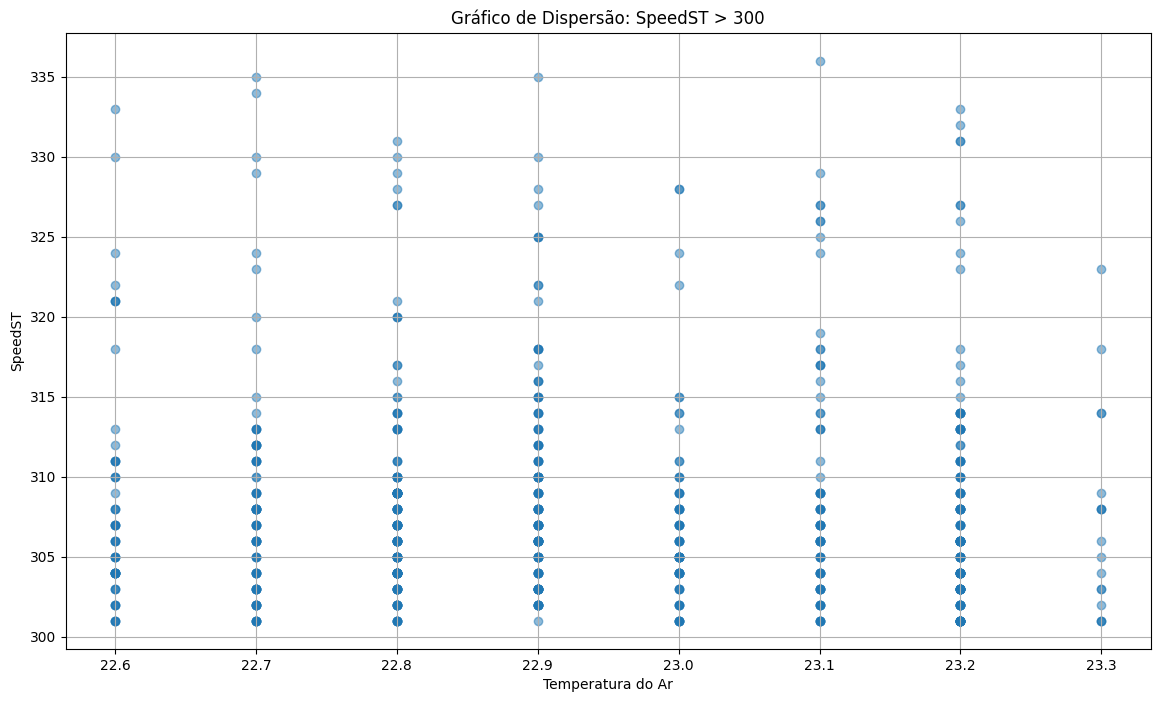

In [61]:
filtered_speedST = merged_data_race_interlagos.query('SpeedST > 300')
plot_scatter(filtered_speedST, 'AirTemp', 'SpeedST', 'Temperatura do Ar', 'SpeedST', 'Gráfico de Dispersão: SpeedST > 300')

Novamente não observamos uma tendência clara nos dados, mas é possível ver que em 23,3 °C as velocidades são mais baixas.

IMPORTANTE: A PARTIR DESSES DADOS É POSSÍVEL CONCLUIR QUE A VELOCIDADE É MENOR EM VELOCIDADES A PARTIR DE 23,3°C?

RESPOSTA: **NÃO, ABSOLUTAMENTE NÃO!**

Essa análise de correlação é utilizada para levantarmos hipóteses sobre os dados, HIPÓTESES. A partir do conhecimento de negócio, neste caso de Motorsport, sabemos que pode existir uma correlação entre a temperatura do ar e a velocidade de reta, por isso escolhemos essas variáveis para criar o gráfico de dispersão. A partir deste ponto, devemos observar os dados para levantarmos hipóteses que possam nos indicar esse tipo de resposta. Porém, antes de tirarmos qualquer conclusão devemos investigar e analisar mais detalhadamente esses dados, verificar se não pode existir outras variáveis que influenciaram nestes valores e só depois disso podemos fazer qualquer tipo de conclusão.

#### Obtendo informações sobre o piloto

In [62]:
session = ff1.get_session(2023, 'Japão', 'Q')

In [63]:
session.load()

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '11', '55', '44', '63', '22', '14', '40', '10', '23', '31', '20', '77', '18', '27', '24', '2']


In [64]:
info_japan_nor = session.get_driver('NOR')

In [65]:
info_japan_nor

DriverNumber                                                          4
BroadcastName                                                  L NORRIS
Abbreviation                                                        NOR
DriverId                                                         norris
TeamName                                                        McLaren
TeamColor                                                        F58020
TeamId                                                          mclaren
FirstName                                                         Lando
LastName                                                         Norris
FullName                                                   Lando Norris
HeadshotUrl           https://www.formula1.com/content/dam/fom-websi...
CountryCode                                                         GBR
Position                                                            3.0
ClassifiedPosition                                              

O método **get_driver()** é usado para obter informações detalhadas sobre um piloto específico que participou desta sessão de Fórmula 1. Ele retorna um objeto que contém várias informações sobre o piloto, incluindo seu nome, número, equipe, e outras estatísticas relevantes.

Veja um exemplo de uso:

In [66]:
# Obtém o nome de um piloto específico (por exemplo, Lando Noris)
driver_name = 'NOR'

# Usa o método get_driver() para obter informações detalhadas sobre o piloto
piloto_info = session.get_driver(driver_name)

# Acessa as informações sobre o piloto
name = piloto_info['FullName']
number = piloto_info['DriverNumber']
team = piloto_info['TeamName']
position = piloto_info['Position']

# Imprime informações sobre o piloto
print(f"Nome: {name}")
print(f"Número: {number}")
print(f"Equipe: {team}")
print(f"Posição na Classificação: {position}")

Nome: Lando Norris
Número: 4
Equipe: McLaren
Posição na Classificação: 3.0


#### Grid de largada

Após ler os dados de uma sessão, podemos utilizar o método '.results' para acessar os resultados daquela sessão.

In [67]:
results_japan_23 = session.results
results_japan_23

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,,NaN,0 days 00:01:29.878000,0 days 00:01:29.964000,0 days 00:01:28.877000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,F58020,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,2.0,,NaN,0 days 00:01:30.439000,0 days 00:01:30.122000,0 days 00:01:29.458000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,3.0,,NaN,0 days 00:01:30.063000,0 days 00:01:30.296000,0 days 00:01:29.493000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,4.0,,NaN,0 days 00:01:30.393000,0 days 00:01:29.940000,0 days 00:01:29.542000,NaT,,NaN
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,5.0,,NaN,0 days 00:01:30.652000,0 days 00:01:29.965000,0 days 00:01:29.650000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,6.0,,NaN,0 days 00:01:30.651000,0 days 00:01:30.067000,0 days 00:01:29.850000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,7.0,,NaN,0 days 00:01:30.811000,0 days 00:01:30.040000,0 days 00:01:29.908000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,8.0,,NaN,0 days 00:01:30.811000,0 days 00:01:30.268000,0 days 00:01:30.219000,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,AlphaTauri,5E8FAA,alphatauri,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,9.0,,NaN,0 days 00:01:30.733000,0 days 00:01:30.204000,0 days 00:01:30.303000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,10.0,,NaN,0 days 00:01:30.971000,0 days 00:01:30.465000,0 days 00:01:30.560000,NaT,,NaN


Vamos verificar quais são as informações disponíveis.

In [68]:
results_japan_23.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [69]:
results_japan_23.info()

<class 'fastf1.core.SessionResults'>
Index: 20 entries, 1 to 2
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   DriverNumber        20 non-null     object         
 1   BroadcastName       20 non-null     object         
 2   Abbreviation        20 non-null     object         
 3   DriverId            20 non-null     object         
 4   TeamName            20 non-null     object         
 5   TeamColor           20 non-null     object         
 6   TeamId              20 non-null     object         
 7   FirstName           20 non-null     object         
 8   LastName            20 non-null     object         
 9   FullName            20 non-null     object         
 10  HeadshotUrl         20 non-null     object         
 11  CountryCode         20 non-null     object         
 12  Position            20 non-null     float64        
 13  ClassifiedPosition  20 non-null     object  

Para mostrarmos uma tabela com o grid de largada vamos utilizar as colunas 'Abbreviation', que contém as 3 primeiras letras do nome do piloto, ordenadas pela coluna 'Position', que contém a posição de classificação de cada piloto.

In [70]:
# Ordena o DataFrame com base na coluna ClassifiedPosition em ordem crescente
sorted_results_japan_23 = results_japan_23.sort_values(by='Position')

# Seleciona apenas as colunas Abbreviation e ClassifiedPosition
sorted_results_subset = sorted_results_japan_23[['Abbreviation', 'Position']]

# Título
print("Grid de Largada GP Japão 2023")
# Mostra o DataFrame ordenado
print(sorted_results_subset)

Grid de Largada GP Japão 2023
   Abbreviation  Position
1           VER       1.0
81          PIA       2.0
4           NOR       3.0
16          LEC       4.0
11          PER       5.0
55          SAI       6.0
44          HAM       7.0
63          RUS       8.0
22          TSU       9.0
14          ALO      10.0
40          LAW      11.0
10          GAS      12.0
23          ALB      13.0
31          OCO      14.0
20          MAG      15.0
77          BOT      16.0
18          STR      17.0
27          HUL      18.0
24          ZHO      19.0
2           SAR      20.0


## Carregando os dados de um evento

Para carregar os dados de uma sessão vamos utilizar a função **get_event**

Os principais parâmetros desta função que vamos utilizar são:

get_event(ano, gp)

Ano:
- Ano do campeonato: 2020, 2021, 2022 ...

GP:
- Número do GP no ano correspondente: em 2023 o GP do Japão foi o número de índice 16.
- Nome do GP: 'Monaco', 'Austria', dentre outros.

In [71]:
british_gp = ff1.get_event(2021, 10)

In [72]:
british_gp

RoundNumber                                                 10
Country                                          Great Britain
Location                                           Silverstone
OfficialEventName    FORMULA 1 PIRELLI BRITISH GRAND PRIX 2021
EventDate                                  2021-07-18 00:00:00
EventName                                   British Grand Prix
EventFormat                                             sprint
Session1                                            Practice 1
Session1Date                         2021-07-16 14:30:00+01:00
Session1DateUtc                            2021-07-16 13:30:00
Session2                                            Qualifying
Session2Date                         2021-07-16 18:00:00+01:00
Session2DateUtc                            2021-07-16 17:00:00
Session3                                            Practice 2
Session3Date                         2021-07-17 12:00:00+01:00
Session3DateUtc                            2021-07-17 1

A partir destas informações podemos saber que o GP da Inglaterra em 2021 aconteceu no dia 18/07, o primeiro treino livre foi dia 16/07 às 13:30 e também os demais horários e dia das sessões de classificação, treino livre 2, corrida spring e corrida oficial.

## Calendário de corridas da temporada

Para carregar o cronograma de uma temporada vamos utilizar a função **get_event_schedule**

Os principais parâmetros desta função que vamos utilizar são:

get_event_schedule(ano)

Ano:
- Ano do campeonato: 2020, 2021, 2022 ...

In [73]:
schedule = ff1.get_event_schedule(2021)
schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Bahrain,FORMULA 1 ARAMCO PRE-SEASON TESTING 2021,2021-03-14,Pre-Season Test,testing,Practice 1,2021-03-12 10:00:00+03:00,2021-03-12 07:00:00,...,Practice 3,2021-03-14 10:00:00+03:00,2021-03-14 07:00:00,None,NaT,NaT,None,NaT,NaT,False
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021,2021-03-28,Bahrain Grand Prix,conventional,Practice 1,2021-03-26 14:30:00+03:00,2021-03-26 11:30:00,...,Practice 3,2021-03-27 15:00:00+03:00,2021-03-27 12:00:00,Qualifying,2021-03-27 18:00:00+03:00,2021-03-27 15:00:00,Race,2021-03-28 18:00:00+03:00,2021-03-28 15:00:00,True
2,2,Italy,Imola,FORMULA 1 PIRELLI GRAN PREMIO DEL MADE IN ITAL...,2021-04-18,Emilia Romagna Grand Prix,conventional,Practice 1,2021-04-16 11:00:00+02:00,2021-04-16 09:00:00,...,Practice 3,2021-04-17 11:00:00+02:00,2021-04-17 09:00:00,Qualifying,2021-04-17 14:00:00+02:00,2021-04-17 12:00:00,Race,2021-04-18 15:00:00+02:00,2021-04-18 13:00:00,True
3,3,Portugal,Portimão,FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2021,2021-05-02,Portuguese Grand Prix,conventional,Practice 1,2021-04-30 11:30:00+01:00,2021-04-30 10:30:00,...,Practice 3,2021-05-01 12:00:00+01:00,2021-05-01 11:00:00,Qualifying,2021-05-01 15:00:00+01:00,2021-05-01 14:00:00,Race,2021-05-02 15:00:00+01:00,2021-05-02 14:00:00,True
4,4,Spain,Barcelona,FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2021,2021-05-09,Spanish Grand Prix,conventional,Practice 1,2021-05-07 11:30:00+02:00,2021-05-07 09:30:00,...,Practice 3,2021-05-08 12:00:00+02:00,2021-05-08 10:00:00,Qualifying,2021-05-08 15:00:00+02:00,2021-05-08 13:00:00,Race,2021-05-09 15:00:00+02:00,2021-05-09 13:00:00,True
5,5,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2021,2021-05-23,Monaco Grand Prix,conventional,Practice 1,2021-05-20 11:30:00+02:00,2021-05-20 09:30:00,...,Practice 3,2021-05-22 12:00:00+02:00,2021-05-22 10:00:00,Qualifying,2021-05-22 15:00:00+02:00,2021-05-22 13:00:00,Race,2021-05-23 15:00:00+02:00,2021-05-23 13:00:00,True
6,6,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2021,2021-06-06,Azerbaijan Grand Prix,conventional,Practice 1,2021-06-04 12:30:00+04:00,2021-06-04 08:30:00,...,Practice 3,2021-06-05 13:00:00+04:00,2021-06-05 09:00:00,Qualifying,2021-06-05 16:00:00+04:00,2021-06-05 12:00:00,Race,2021-06-06 16:00:00+04:00,2021-06-06 12:00:00,True
7,7,France,Le Castellet,FORMULA 1 EMIRATES GRAND PRIX DE FRANCE 2021,2021-06-20,French Grand Prix,conventional,Practice 1,2021-06-18 11:30:00+02:00,2021-06-18 09:30:00,...,Practice 3,2021-06-19 12:00:00+02:00,2021-06-19 10:00:00,Qualifying,2021-06-19 15:00:00+02:00,2021-06-19 13:00:00,Race,2021-06-20 15:00:00+02:00,2021-06-20 13:00:00,True
8,8,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS DER STEIERMARK 2021,2021-06-27,Styrian Grand Prix,conventional,Practice 1,2021-06-25 11:30:00+02:00,2021-06-25 09:30:00,...,Practice 3,2021-06-26 12:00:00+02:00,2021-06-26 10:00:00,Qualifying,2021-06-26 15:00:00+02:00,2021-06-26 13:00:00,Race,2021-06-27 15:00:00+02:00,2021-06-27 13:00:00,True
9,9,Austria,Spielberg,FORMULA 1 BWT GROSSER PREIS VON ÖSTERREICH 2021,2021-07-04,Austrian Grand Prix,conventional,Practice 1,2021-07-02 11:30:00+02:00,2021-07-02 09:30:00,...,Practice 3,2021-07-03 12:00:00+02:00,2021-07-03 10:00:00,Qualifying,2021-07-03 15:00:00+02:00,2021-07-03 13:00:00,Race,2021-07-04 15:00:00+02:00,2021-07-04 13:00:00,True


In [74]:
schedule.columns

Index(['RoundNumber', 'Country', 'Location', 'OfficialEventName', 'EventDate',
       'EventName', 'EventFormat', 'Session1', 'Session1Date',
       'Session1DateUtc', 'Session2', 'Session2Date', 'Session2DateUtc',
       'Session3', 'Session3Date', 'Session3DateUtc', 'Session4',
       'Session4Date', 'Session4DateUtc', 'Session5', 'Session5Date',
       'Session5DateUtc', 'F1ApiSupport'],
      dtype='object')

Agora podemos escolher as colunas RoundNumber, EventDate e EventName para exibir as informações do cronograma de eventos da Fórmula 1 em 2023.

In [75]:
# Ordena o DataFrame com base na coluna RoundNumber em ordem crescente
sorted_schedule = schedule.sort_values(by='RoundNumber')

# Título
print("Calendário de Eventos Fórmula 1 2021")

# Mostra o DataFrame ordenado
print(sorted_schedule[['RoundNumber', 'EventDate', 'EventName']])

Calendário de Eventos Fórmula 1 2021
    RoundNumber  EventDate                  EventName
0             0 2021-03-14            Pre-Season Test
1             1 2021-03-28         Bahrain Grand Prix
2             2 2021-04-18  Emilia Romagna Grand Prix
3             3 2021-05-02      Portuguese Grand Prix
4             4 2021-05-09         Spanish Grand Prix
5             5 2021-05-23          Monaco Grand Prix
6             6 2021-06-06      Azerbaijan Grand Prix
7             7 2021-06-20          French Grand Prix
8             8 2021-06-27         Styrian Grand Prix
9             9 2021-07-04        Austrian Grand Prix
10           10 2021-07-18         British Grand Prix
11           11 2021-08-01       Hungarian Grand Prix
12           12 2021-08-29         Belgian Grand Prix
13           13 2021-09-05           Dutch Grand Prix
14           14 2021-09-12         Italian Grand Prix
15           15 2021-09-26         Russian Grand Prix
16           16 2021-10-10         Turkish Gr

Um recurso muito interessante em Python são bibliotecas que possuem ferramentas para mapas geográficos. Podemos, por exemplo, usar a geopandas do matplotlib para plotar um mapa mundial e colorir os países que serão sede de corridas de Fórmula 1 no calendário de 2021.

Primeiro vamos criar uma lista que contém os países únicos em 2021.

In [76]:
# Obtém os valores únicos da coluna 'Country'
valores_unicos = schedule['Country'].unique()

# Converte os valores únicos para uma lista
lista_paises = list(valores_unicos)

# Exibe a lista de países
print(lista_paises)

['Bahrain', 'Italy', 'Portugal', 'Spain', 'Monaco', 'Azerbaijan', 'France', 'Austria', 'Great Britain', 'Hungary', 'Belgium', 'Netherlands', 'Russia', 'Turkey', 'United States', 'Mexico', 'Brazil', 'Qatar', 'Saudi Arabia', 'Abu Dhabi']


Agora vamos importar duas bibliotecas, geopandas e adjustText para utilizarmos na construção do gráfico.

In [82]:
# Pode ser que você precise instalar as bibliotecas a seguir antes de continuar o código

# Importa o instalador pip
#import pip
# Instala a biblioteca geopandas
#pip install geopandas matplotlib
# Instala a biblioteca adjustText
#pip install adjustText

In [77]:
# Importa as bibliotecas geopandas e adjustText

import geopandas as gpd
from adjustText import adjust_text

Agora vamos criar o gráfico geográfico colorindo os países presentes no calendário da Fórmula 1 de 2021.

C:\Users\fabin\AppData\Local\Temp\ipykernel_15088\4221652093.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\fabin\AppData\Local\Temp\ipykernel_15088\4221652093.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(paises_filtrados.geometry.centroid.x, paises_filtrados.geometry.centroid.y, paises_filtrados['name']):


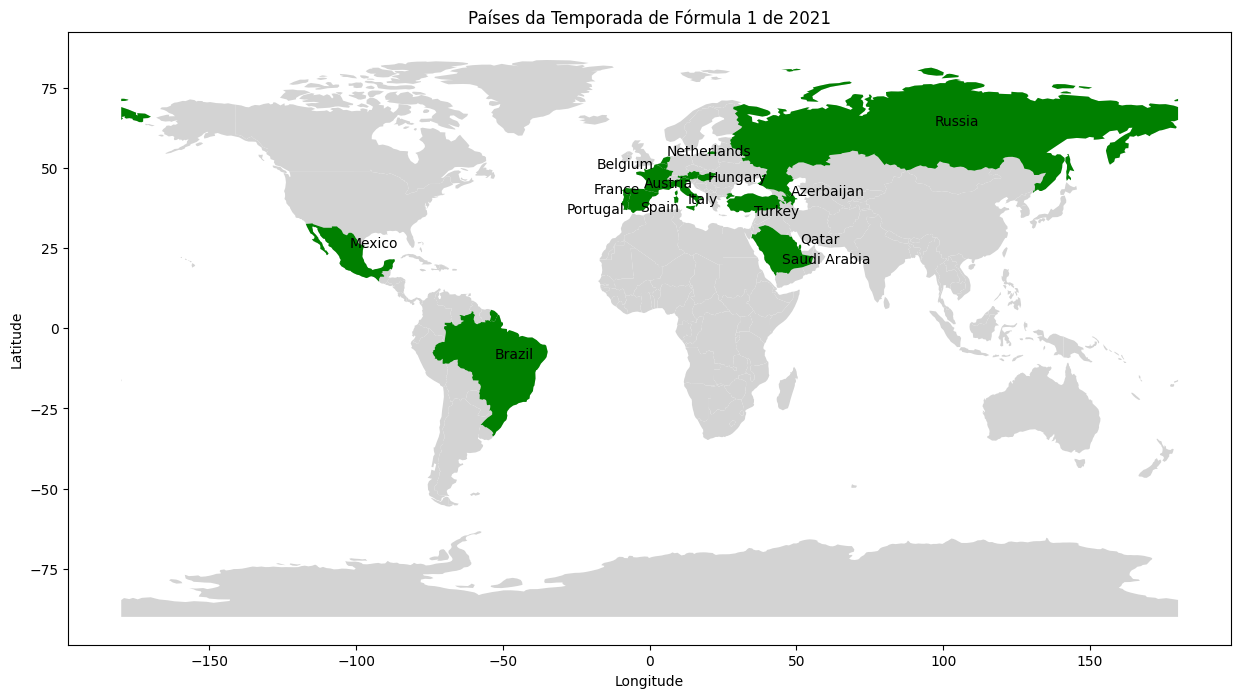

In [78]:
# Carrega o mapa mundial
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtra os dados do mundo para incluir apenas os países na lista
paises_filtrados = world[world['name'].isin(lista_paises)]

# Plota o mapa mundial com os países destacados
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
paises_filtrados.plot(ax=ax, color='green')

# Adiciona os rótulos dos países ao mapa usando adjustText
texts = []
for x, y, label in zip(paises_filtrados.geometry.centroid.x, paises_filtrados.geometry.centroid.y, paises_filtrados['name']):
    texts.append(plt.text(x, y, label, fontsize=10, ha='center'))

# Ajusta a posição dos rótulos para evitar sobreposição
adjust_text(texts)

# Configurações do gráfico
ax.set_title('Países da Temporada de Fórmula 1 de 2021')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()